## Load Libraries

In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import tarfile
import sys
os.chdir('../..')
os.getcwd()
#sys.path.append('c:/users/pesylvestre/appdata/roaming/python/python310/site-packages')

'D:\\Utilisateur\\SPierre-Eloy\\Documents\\Informatique\\Brail'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from mne import Epochs, find_events
import mne
import glob

from mne import find_events

plt.rcParams['figure.figsize'] = 14, 4 
#from notebooks.kapel.preproc import data_extract,set_info, bp_filter, epochs_gen

## Load Data

In [4]:
def eeg_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    #need a .vhdr
    
    with open(path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(filedata[filedata.find("DataFile=")+len("DataFile="):
                                         filedata.find(".eeg")+1],
                                path.split("/")[-1].replace("vhdr", ""))
    with open(path, 'w') as file:
        file.write(filedata)
    raw = mne.io.read_raw_brainvision(path)
    raw.plot()
    raw.load_data()
    filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)
    events = mne.events_from_annotations(filt_raw)
    epochs = mne.Epochs(filt_raw, events[0], event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs, events[0], events[1], raw, filt_raw

In [5]:
def tar_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    tar = tarfile.open(path)
    d = tar.getnames()
    print("->",os.getcwd())
    #print('/'.join(path.split("/")[0:-1]))
    tar.extractall(path='/'.join(path.split("/")[0:-1]))
    tar.close()
    print(d)
    return eeg_to_epoch(path.replace(d[0]+".tar.gz", '')+"\n".join(s for s in d if "vhdr" in s), event_id, tmin, tmax, picks)

-> D:\Utilisateur\SPierre-Eloy\Documents\Informatique\Brail
['sub-032301', 'sub-032301/RSEEG', 'sub-032301/RSEEG/sub-032301.vmrk', 'sub-032301/RSEEG/sub-032301.vhdr', 'sub-032301/RSEEG/sub-032301.eeg']
Extracting parameters from D:/Utilisateur/SPierre-Eloy/Documents/Informatique/Brail/In-HousePOC3/in_housepoc3/data/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
Using matplotlib as 2D backend.


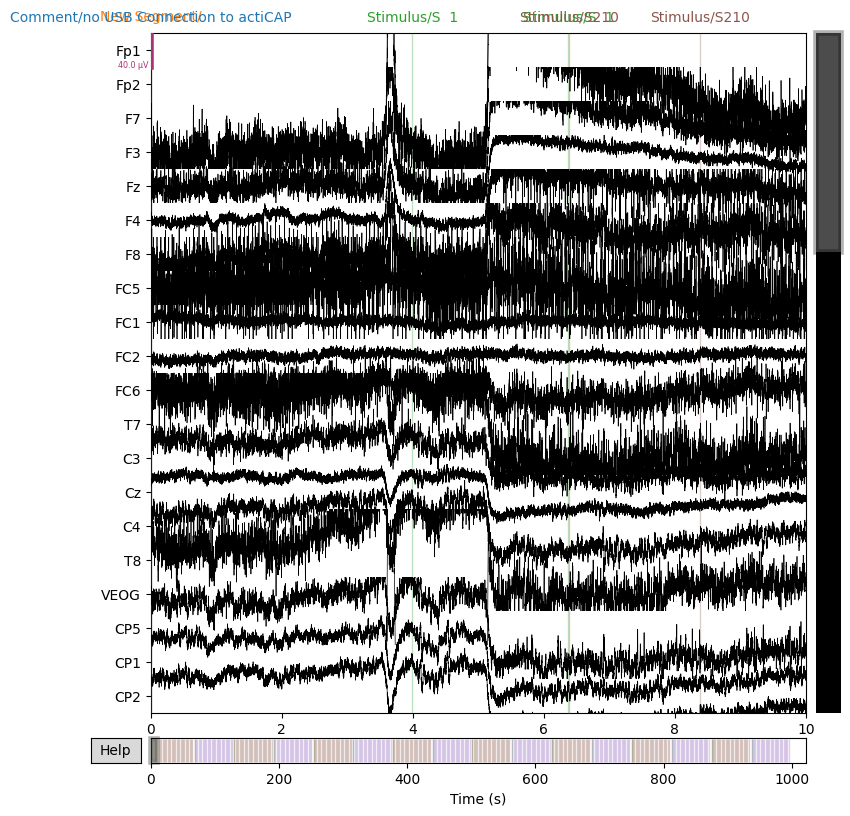

Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
Not setting metadata
17 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 17 events and 2501 original time points ...
0 bad epochs dropped


In [6]:
#Manualy download lemon data from : http://fcon_1000.projects.nitrc.org/indi/retro/MPI_LEMON/downloads/download_EEG.html
epv = tar_to_epoch("D:/Utilisateur/SPierre-Eloy/Documents/Informatique/Brail/In-HousePOC3/in_housepoc3/data/sub-032301.tar.gz")

In [7]:
print(epv)

(<Epochs |  17 events (all good), -0.2 – 0.8 s, baseline -0.2 – 0 s, ~20.2 MB, data loaded,
 'T': 17>, array([[      0,       0,   99999],
       [      0,       0,   10001],
       [   9979,       0,       1],
       ...,
       [2478309,       0,     200],
       [2483309,       0,     200],
       [2488309,       0,     200]]), {'Comment/no USB Connection to actiCAP': 10001, 'New Segment/': 99999, 'Stimulus/S  1': 1, 'Stimulus/S200': 200, 'Stimulus/S210': 210}, <RawBrainVision | sub-032301.eeg, 62 x 2555000 (1022.0 s), ~1.18 GB, data loaded>, <RawBrainVision | sub-032301.eeg, 62 x 2555000 (1022.0 s), ~1.18 GB, data loaded>)


## Event matrix

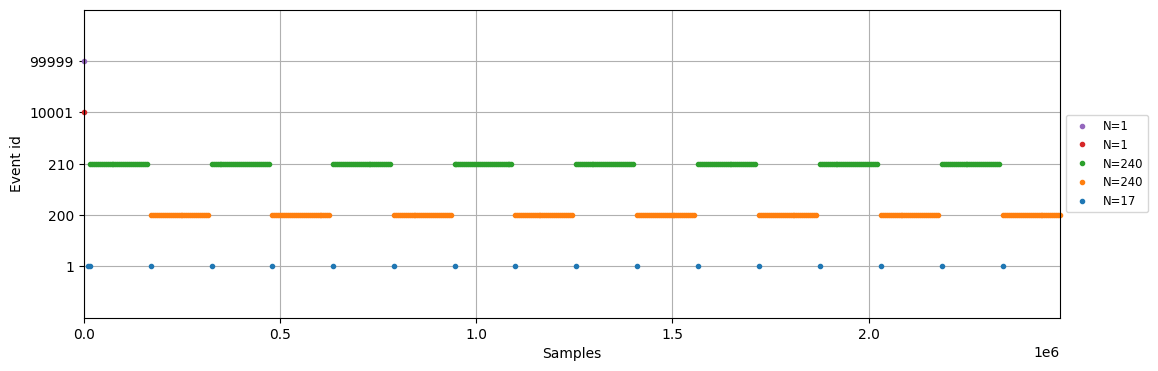

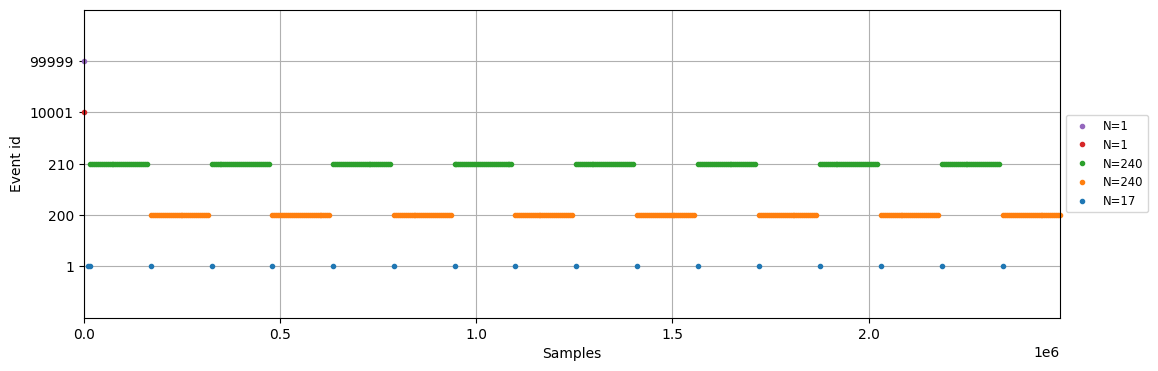

In [8]:
epochs = epv[0]
events = epv[1]
raw = epv[3]
filt_raw = epv[4]
mne.viz.plot_events(events)

## Plot filtered data with events

In [9]:
epochs

<Epochs |  17 events (all good), -0.2 – 0.8 s, baseline -0.2 – 0 s, ~20.2 MB, data loaded,
 'T': 17>

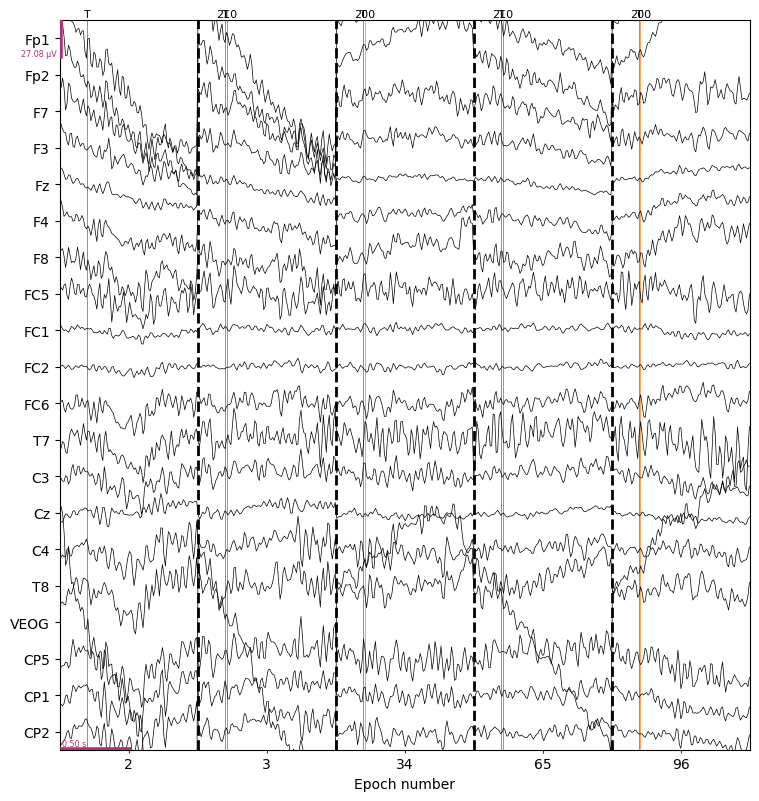

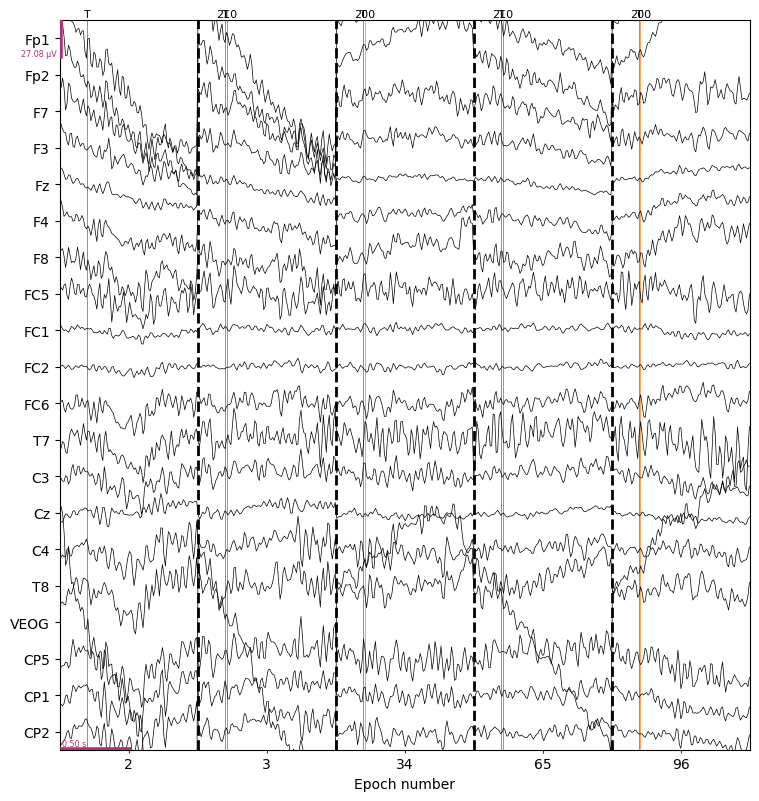

In [10]:
epochs.plot(picks='eeg', show_scrollbars=False, events = events,
                      event_id=dict(T = 1), n_epochs = 5,  scalings = 'auto')

Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 samples (3.300 s)



C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\575911746.py:1: RuntimeWarning: filter_length (8251) is longer than the signal (2501), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(l_freq=1.0, h_freq=40.0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s


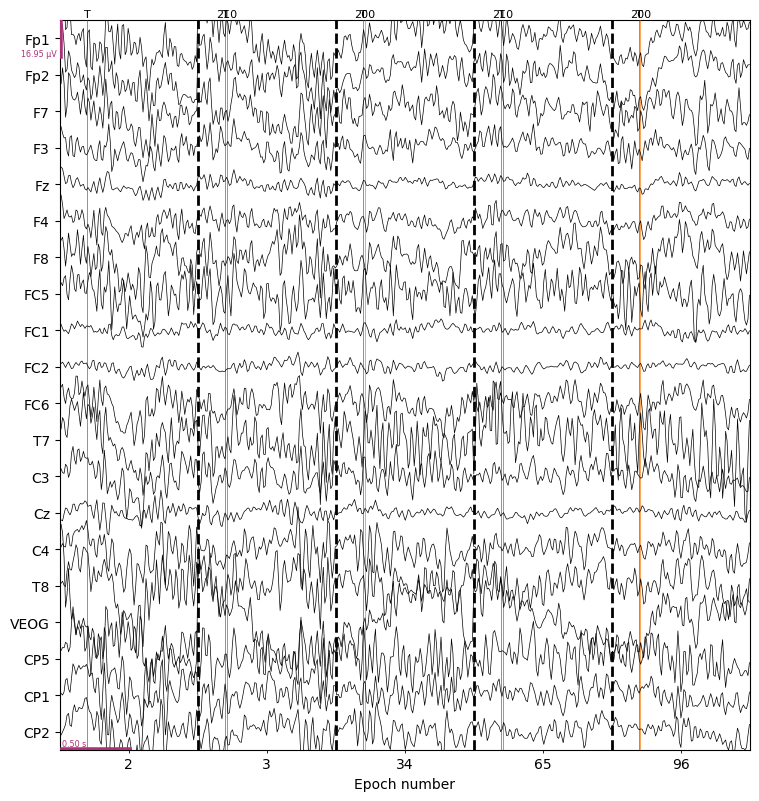

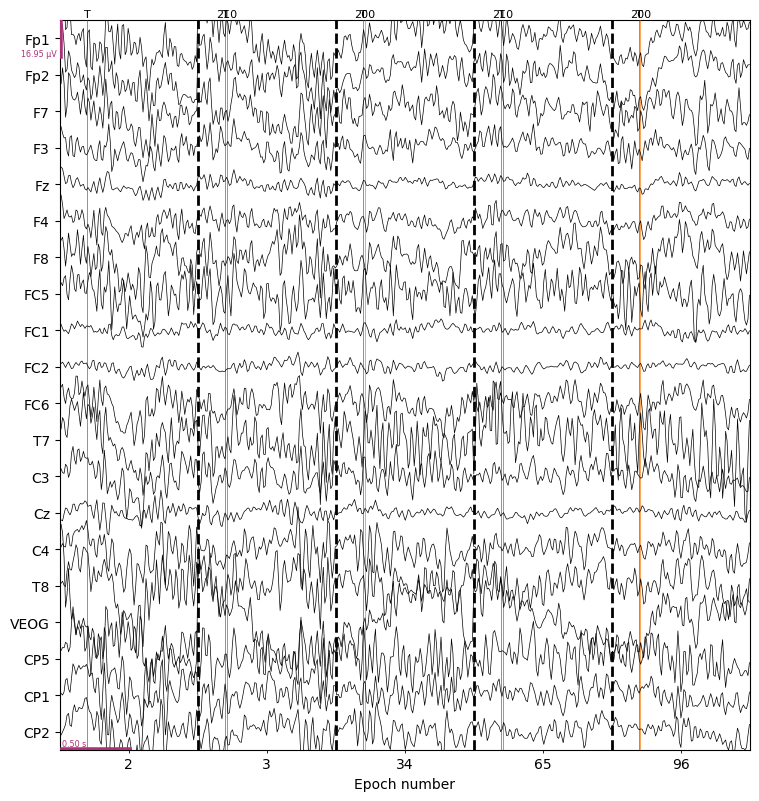

In [31]:
epochs.filter(l_freq=1.0, h_freq=40.0)
epochs.plot(picks='eeg', show_scrollbars=False, events = events,
                      event_id=dict(T = 1), n_epochs = 5,  scalings = 'auto')

# Butterfly plot

In [11]:
"""mne.viz.plot_epochs(epochs, picks='eeg', show_scrollbars=False, events = events,
                    n_epochs = 3, scalings = 'auto', butterfly = True,
                   event_color = {1 : 'blue'});"""

"mne.viz.plot_epochs(epochs, picks='eeg', show_scrollbars=False, events = events,\n                    n_epochs = 3, scalings = 'auto', butterfly = True,\n                   event_color = {1 : 'blue'});"

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


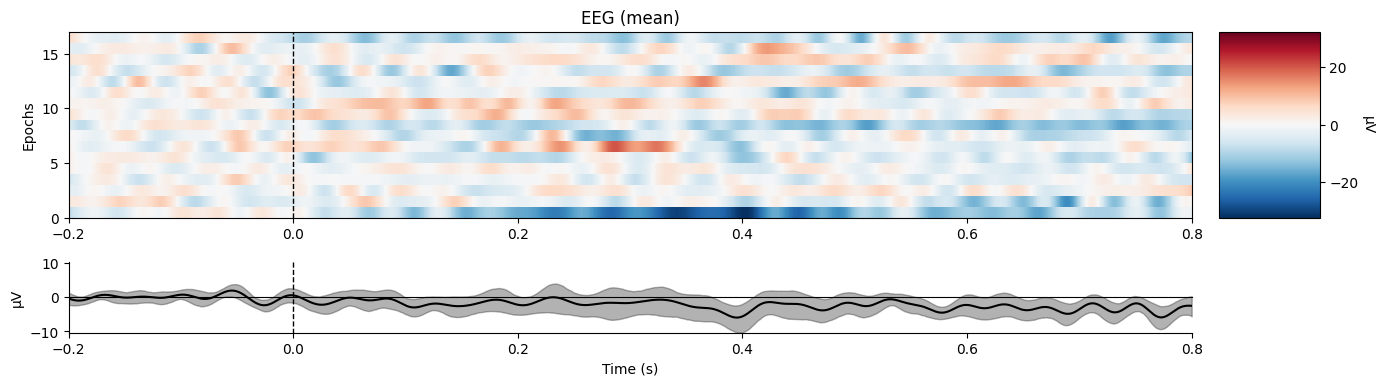

In [12]:
epochs['T'].plot_image(combine='mean');

## Epochs Image Plots
## Non Target image plot

## Target image plot

In [13]:
channels = ["Fp1","Fp2","F7","F3","Fz","F4","F8","FC5","FC1","FC2","FC6","T7","C3","Cz","C4","T8","VEOG","CP5","CP1","CP2","CP6","AFz","P7","P3","Pz","P4","P8","PO9","O1","Oz","O2","PO10","AF7","AF3","AF4","AF8","F5","F1","F2","F6","FT7","FC3","FC4","FT8","C5","C1","C2","C6","TP7","CP3","CPz","CP4","TP8","P5","P1","P2","P6","PO7","PO3","POz","PO4","PO8"]

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Fp1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


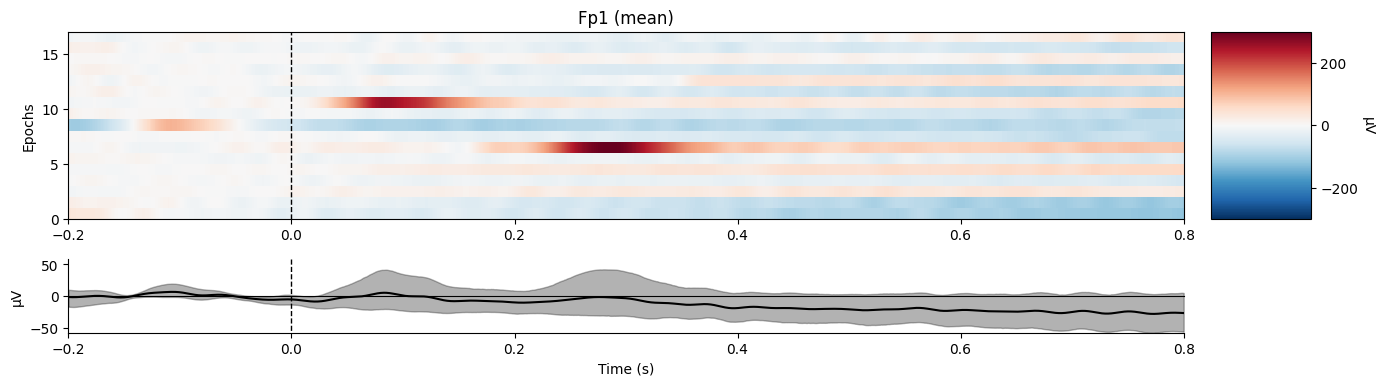

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Fp2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


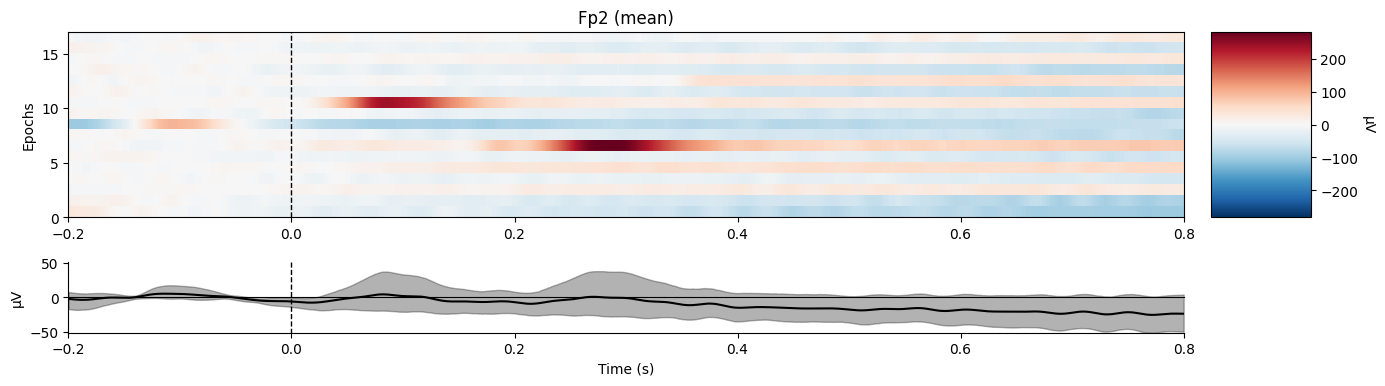

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


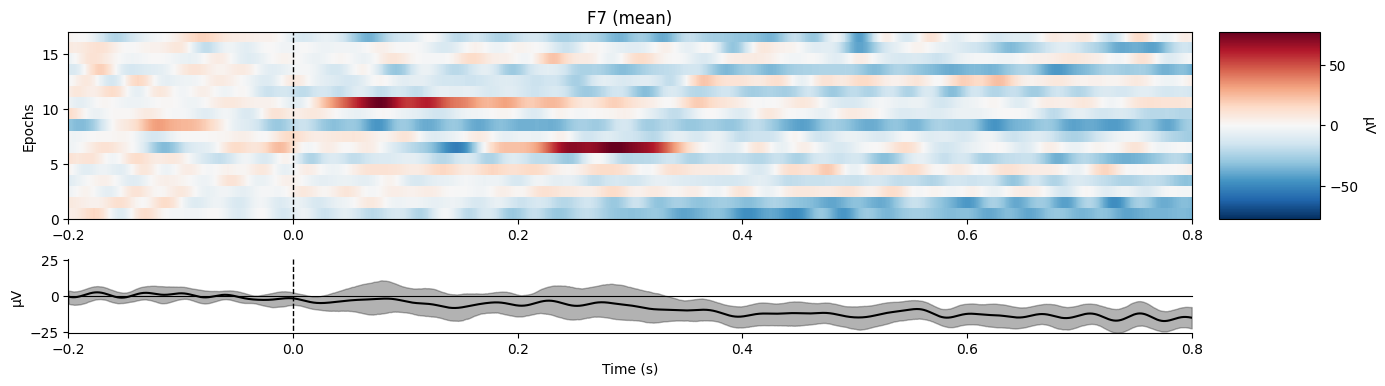

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


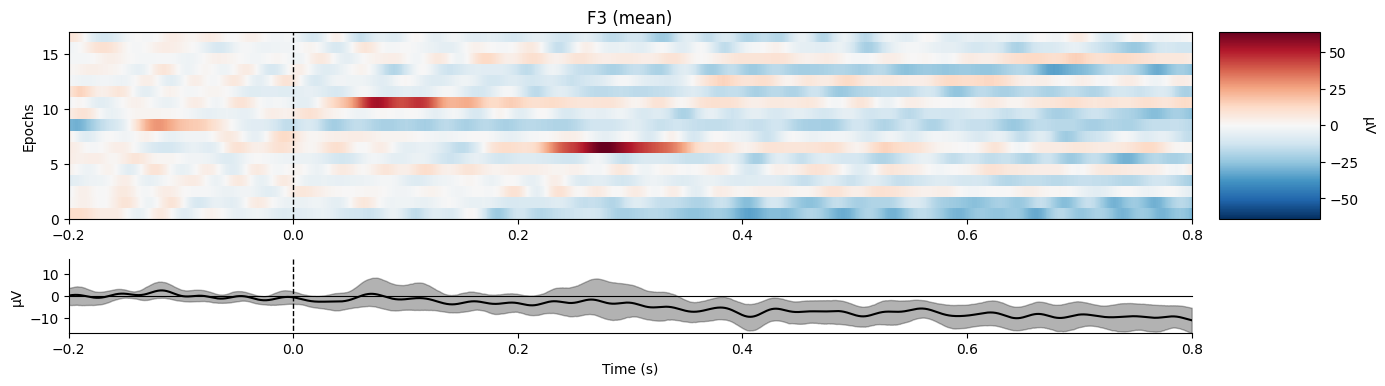

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Fz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


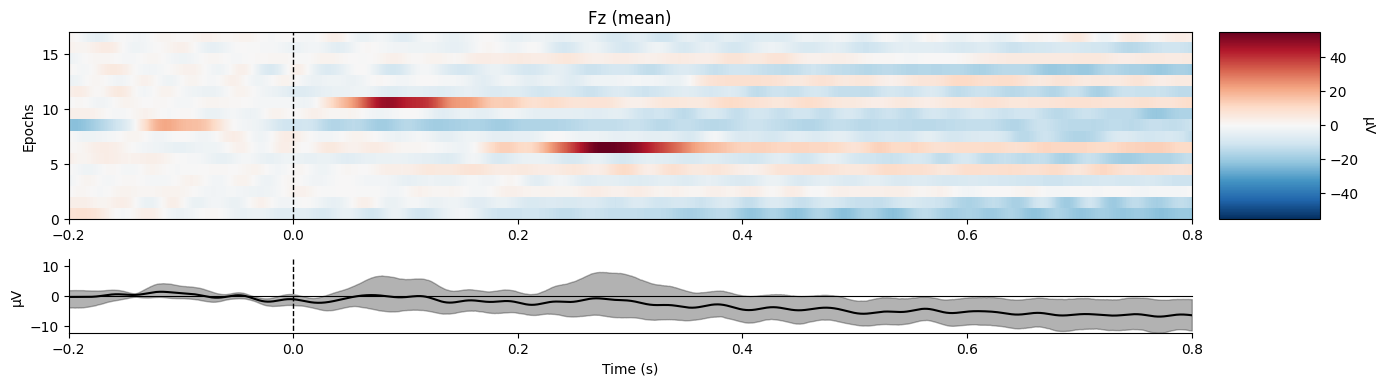

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


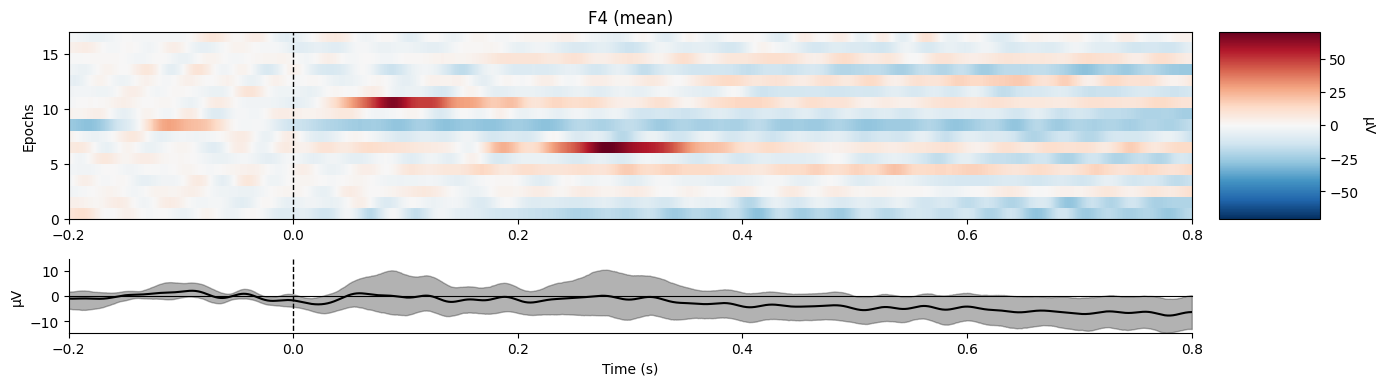

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


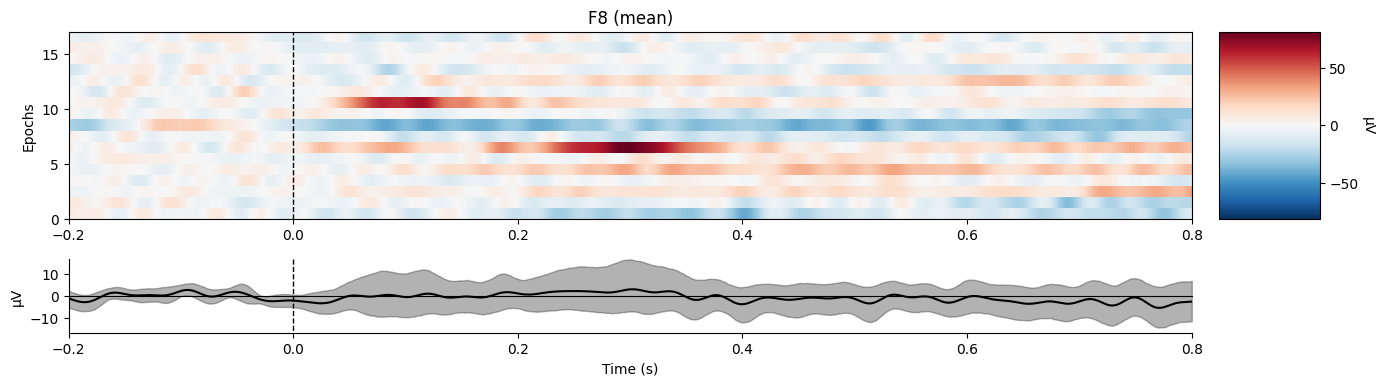

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


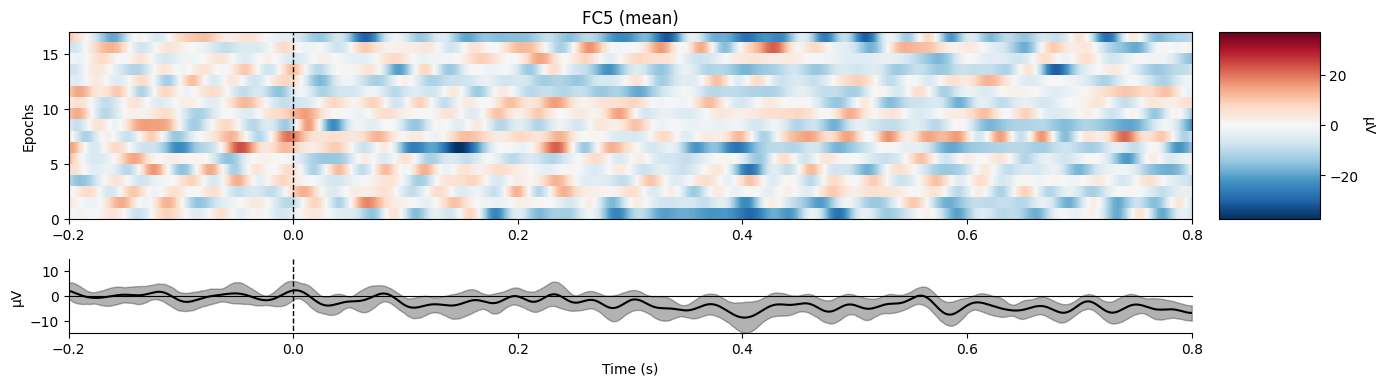

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


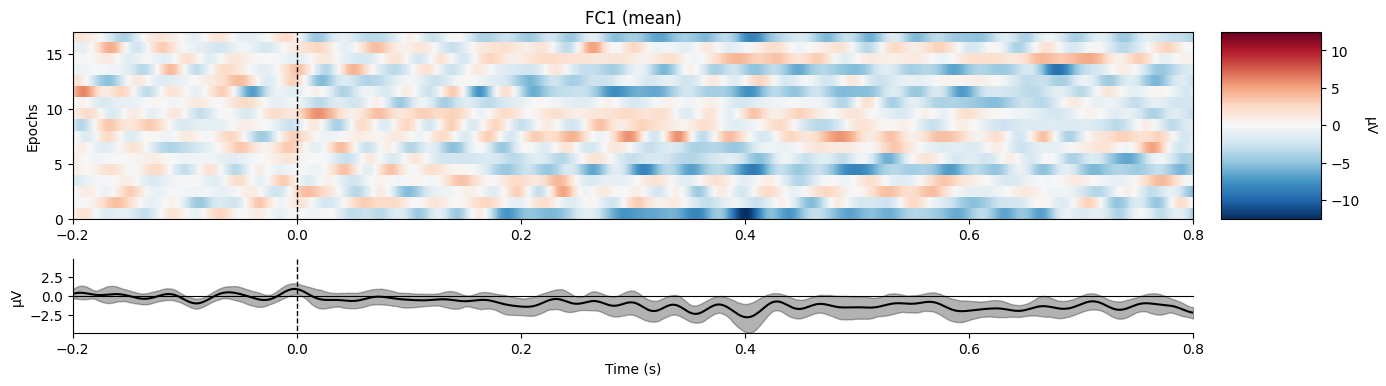

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


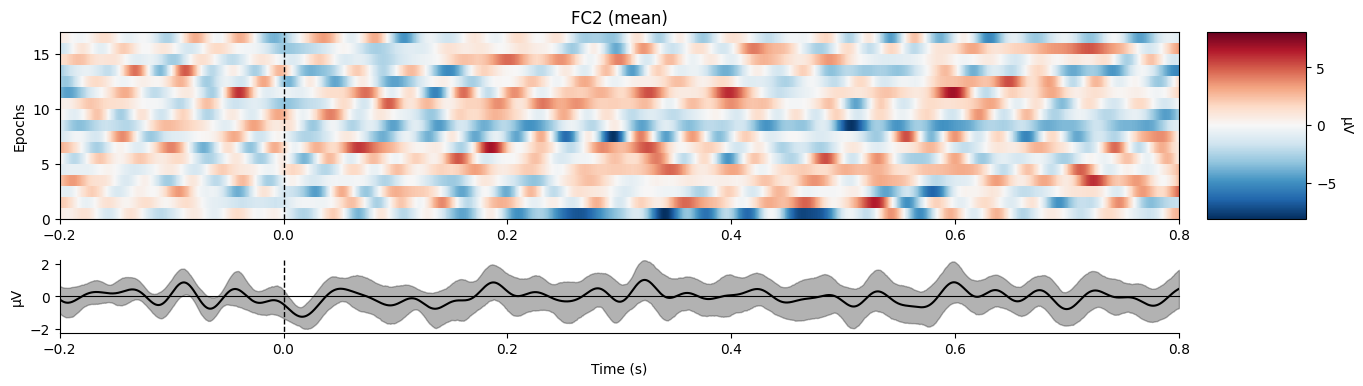

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


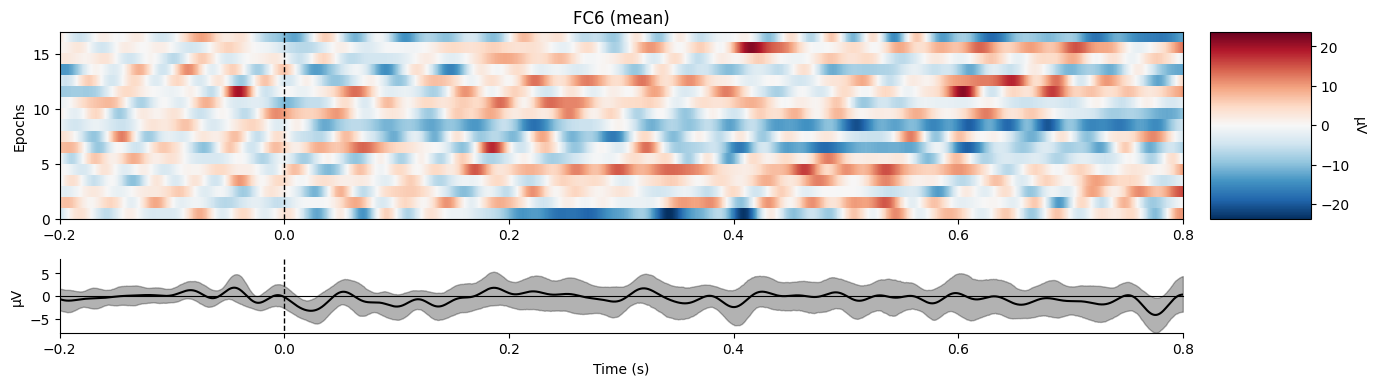

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "T7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


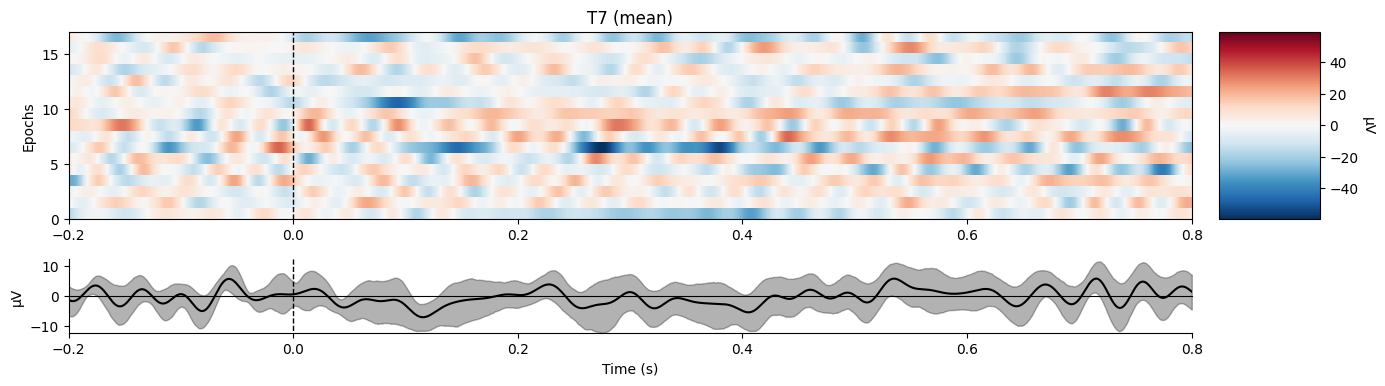

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


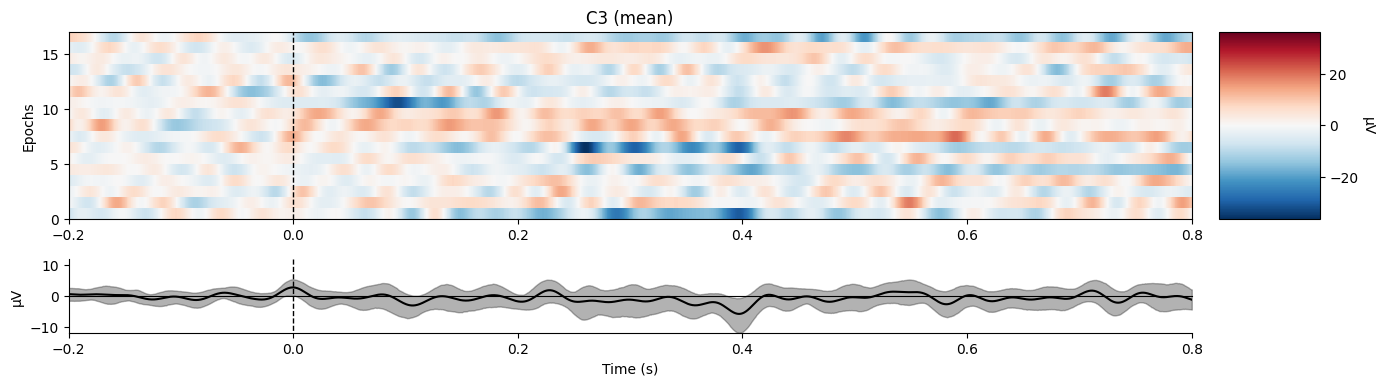

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


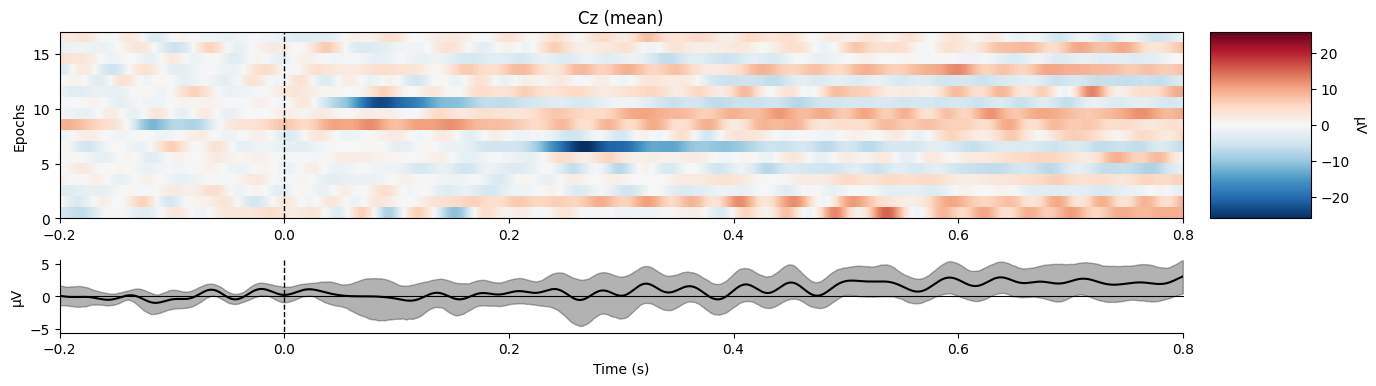

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


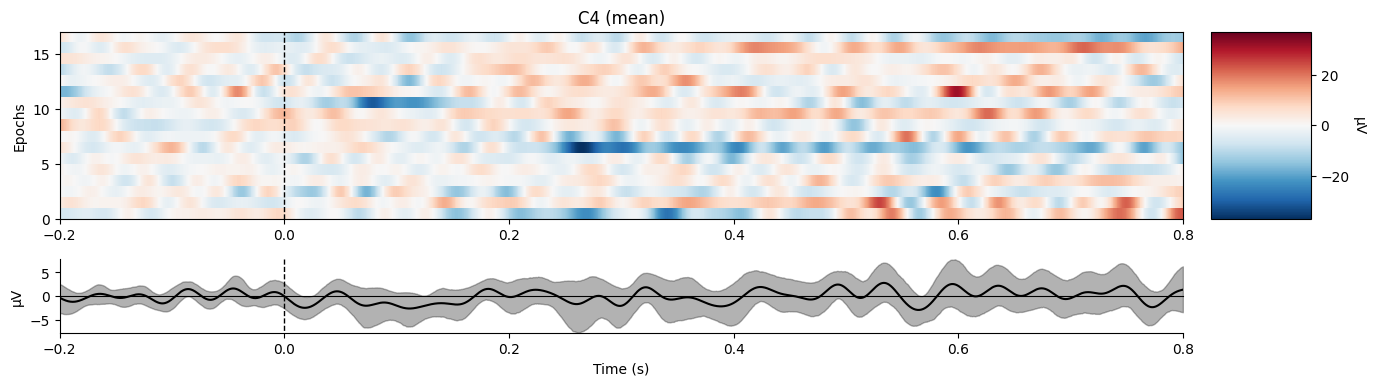

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "T8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


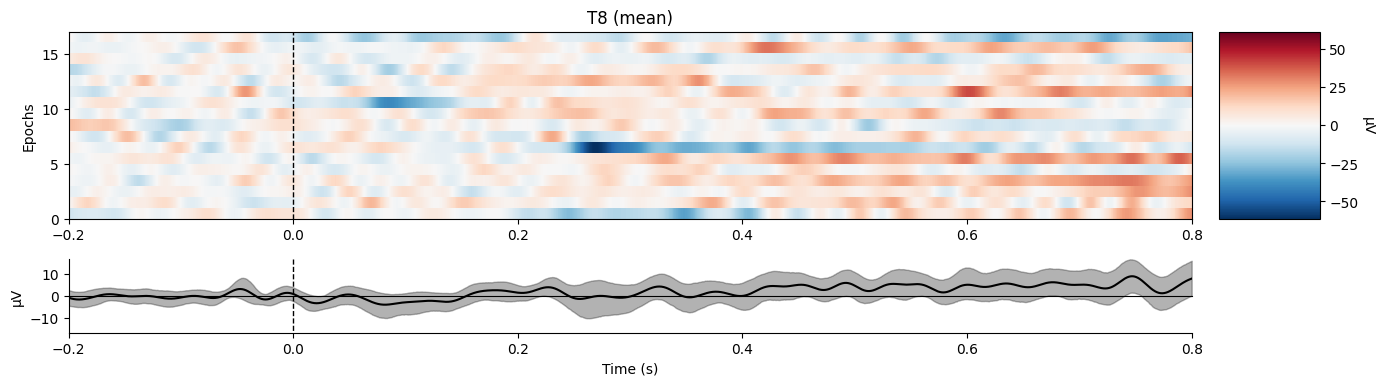

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "VEOG"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


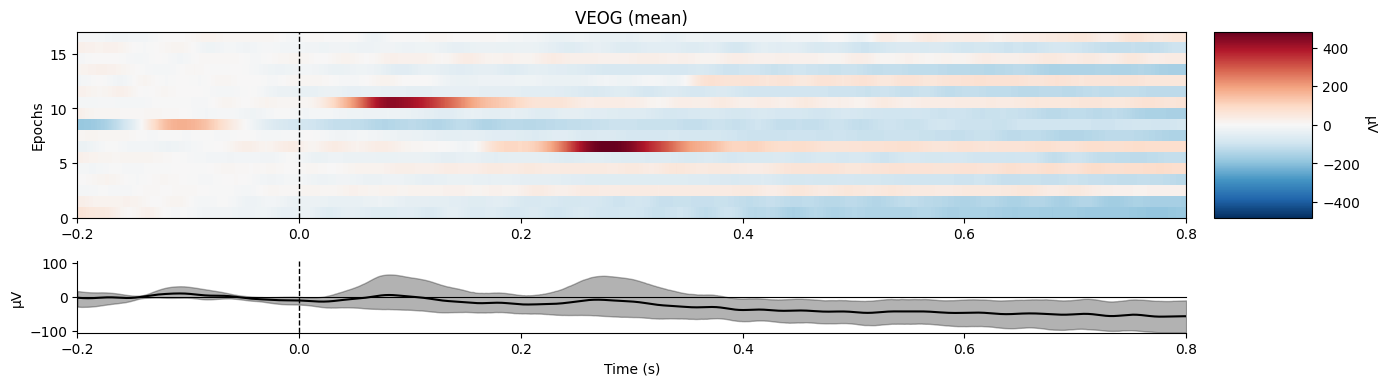

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


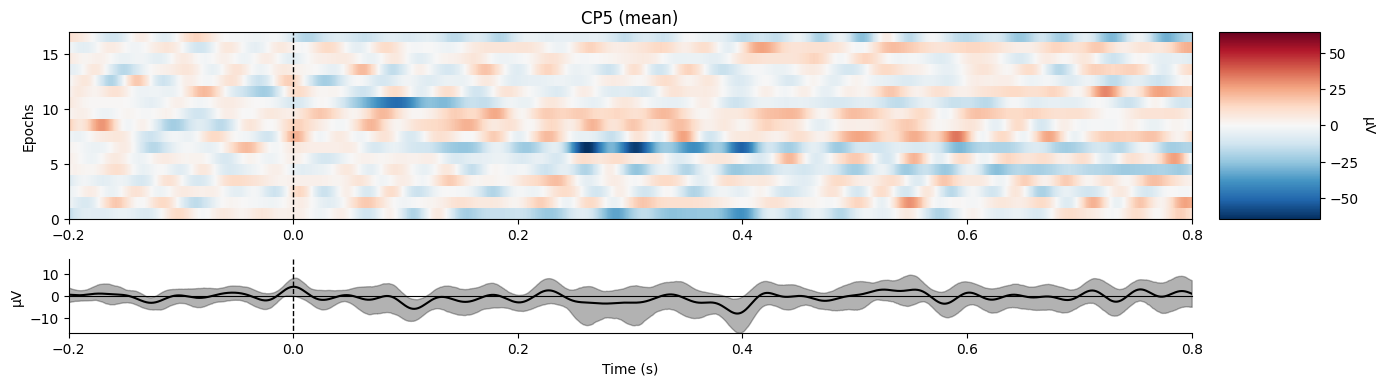

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


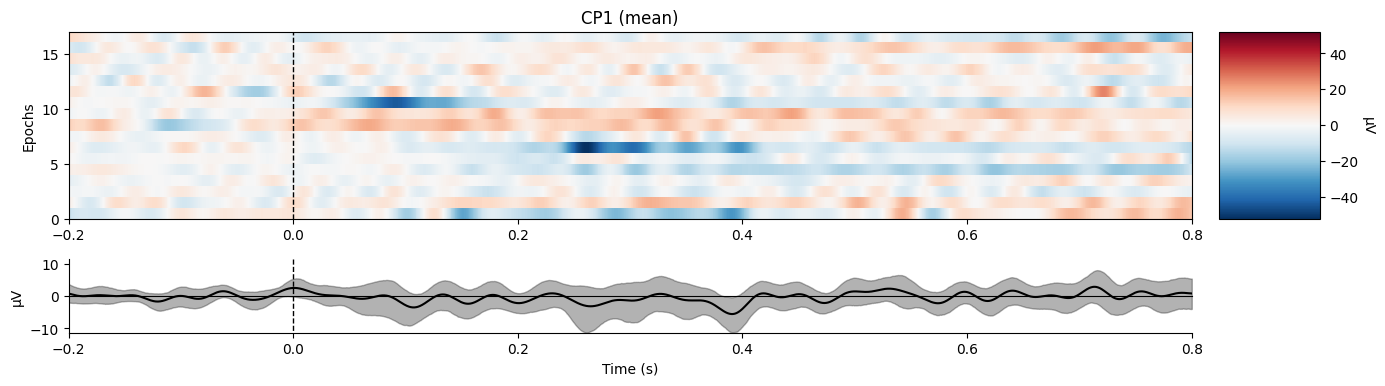

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


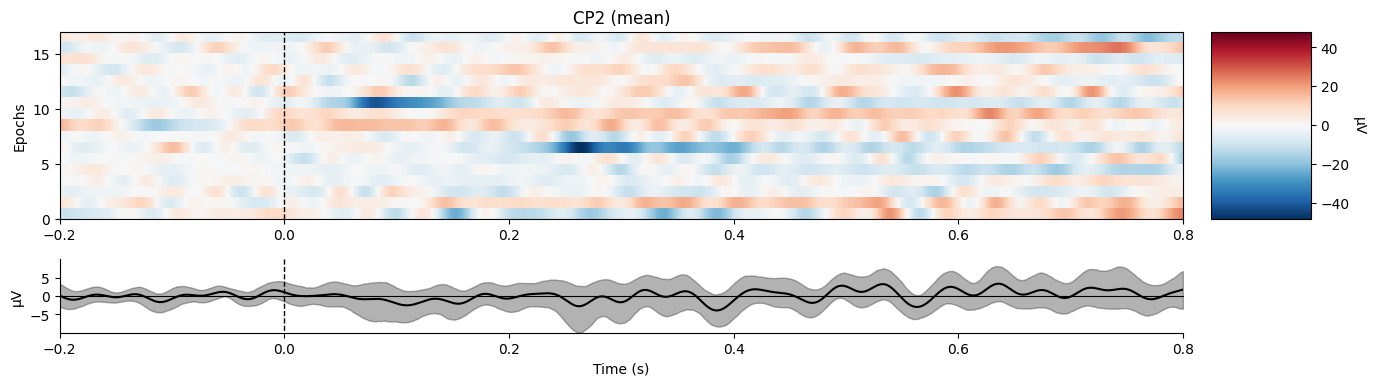

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


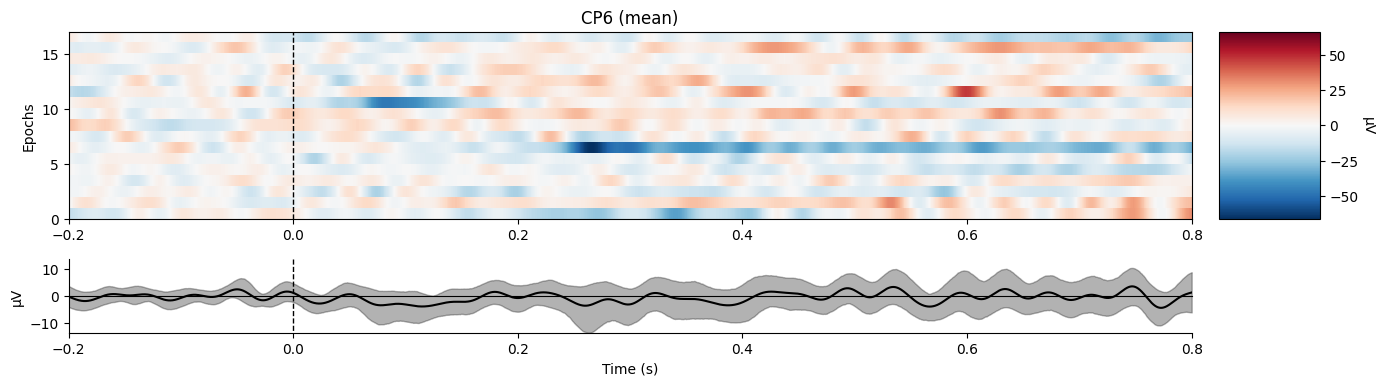

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "AFz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


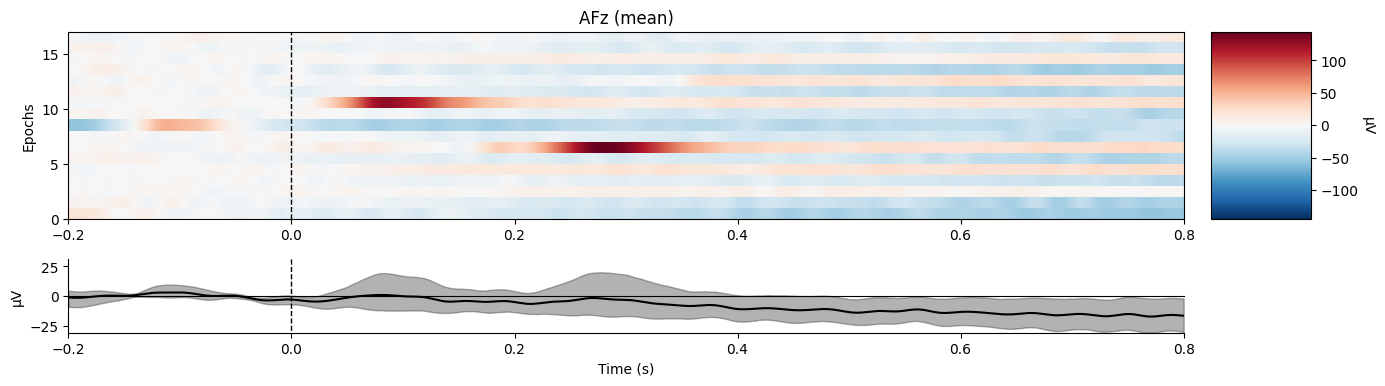

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


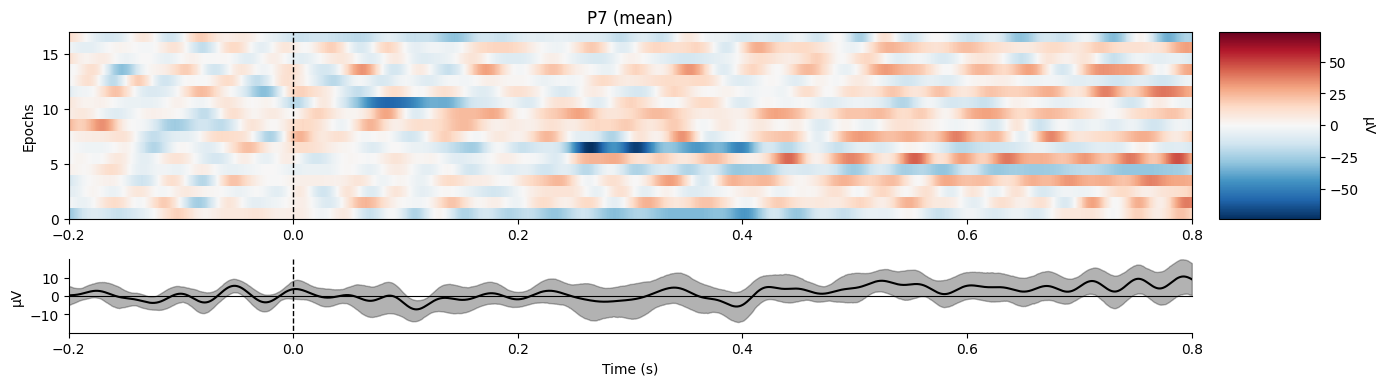

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


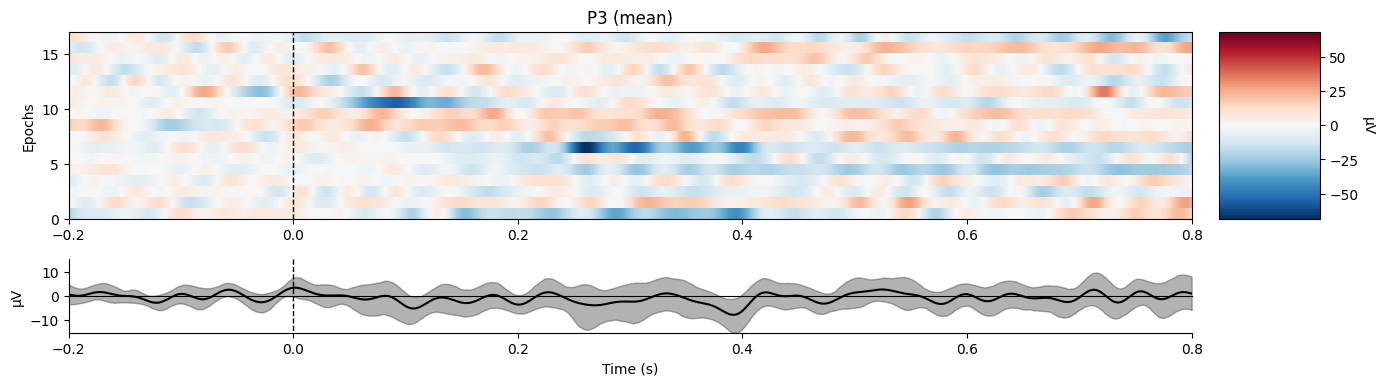

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Pz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


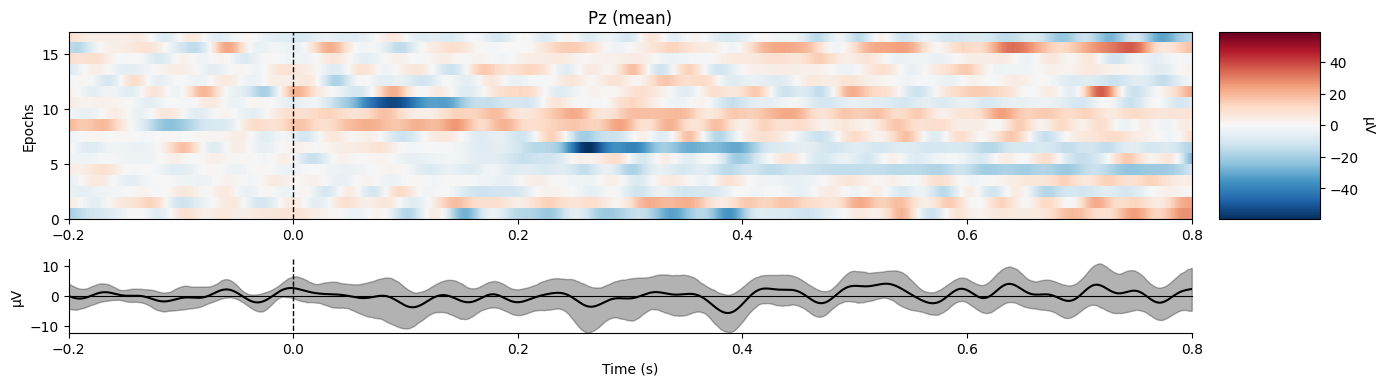

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


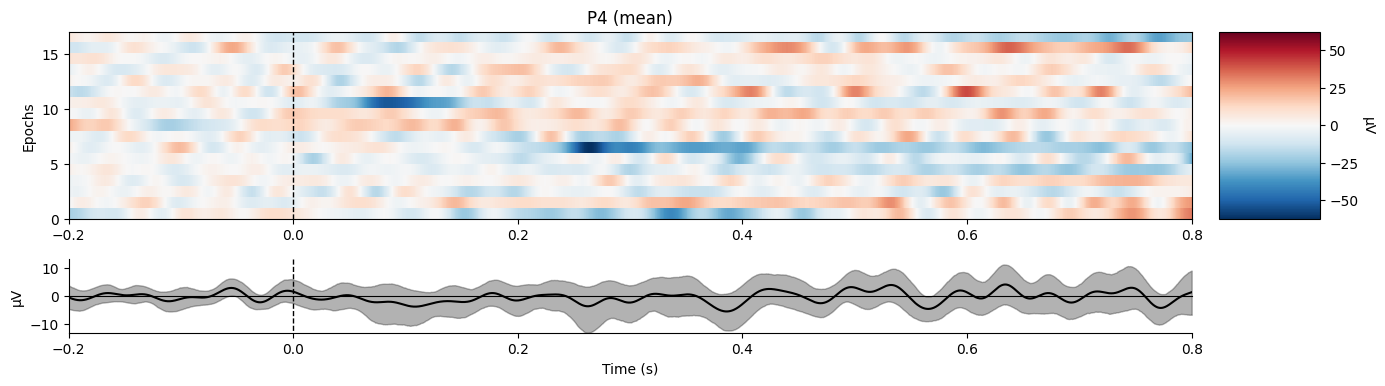

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


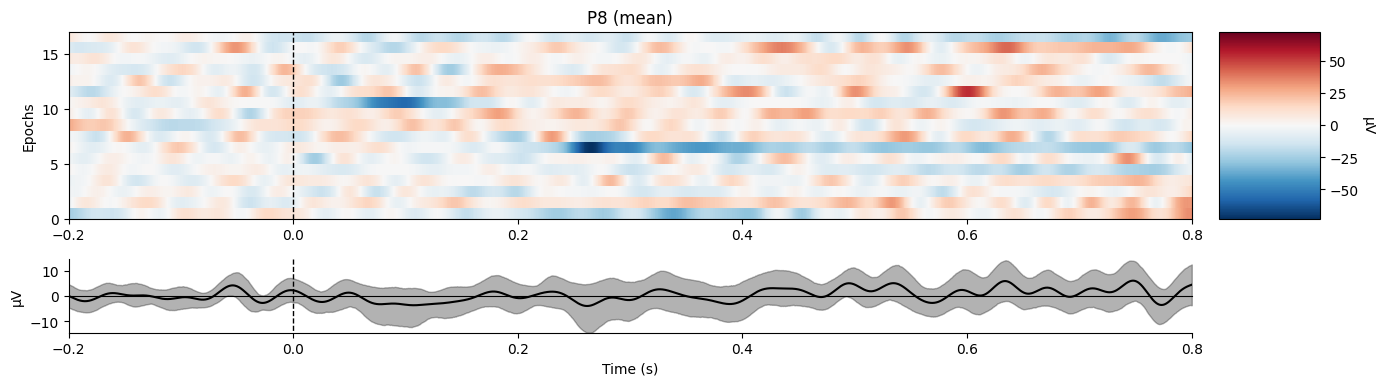

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO9"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


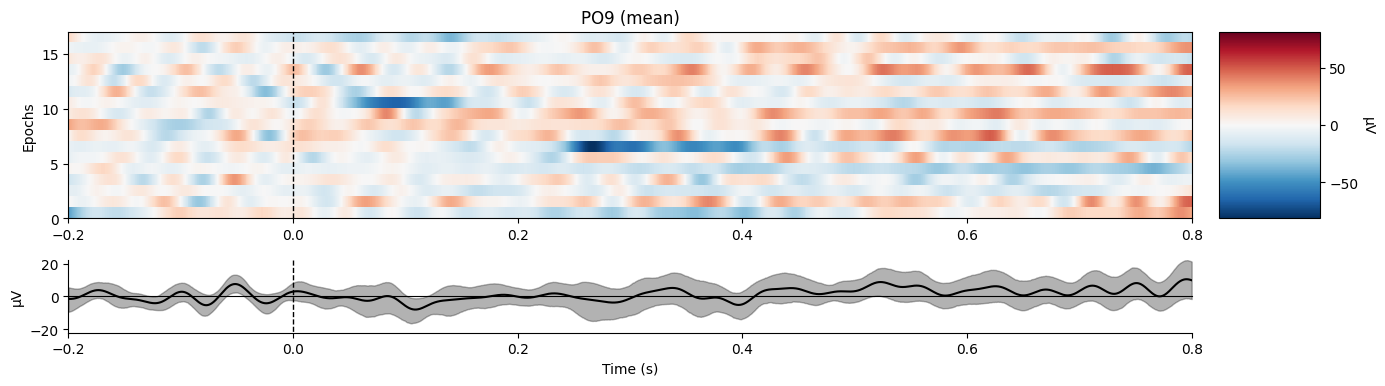

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "O1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


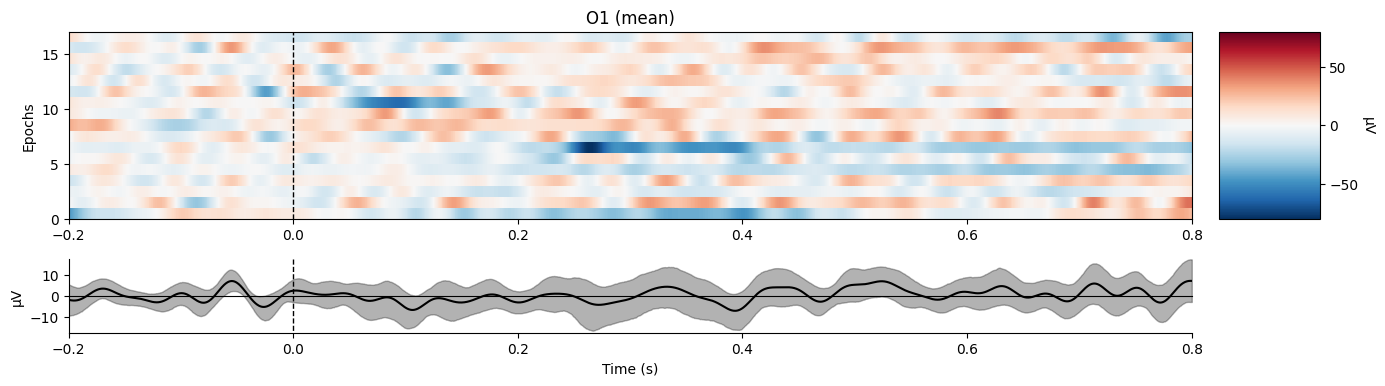

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "Oz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


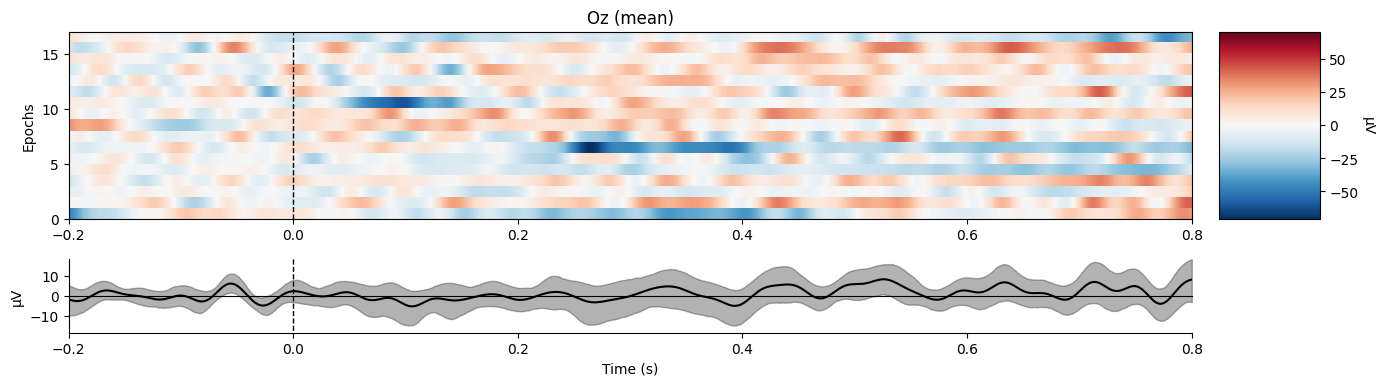

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "O2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


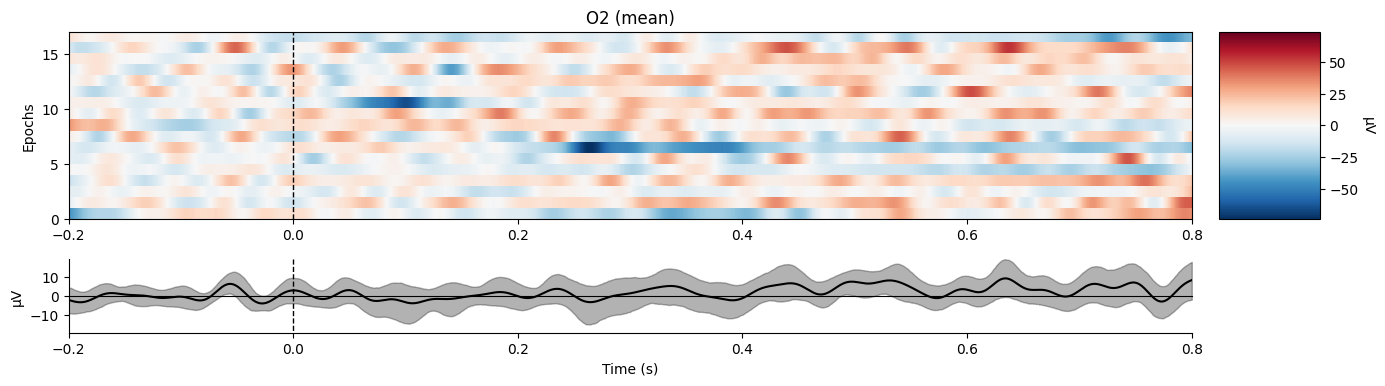

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO10"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


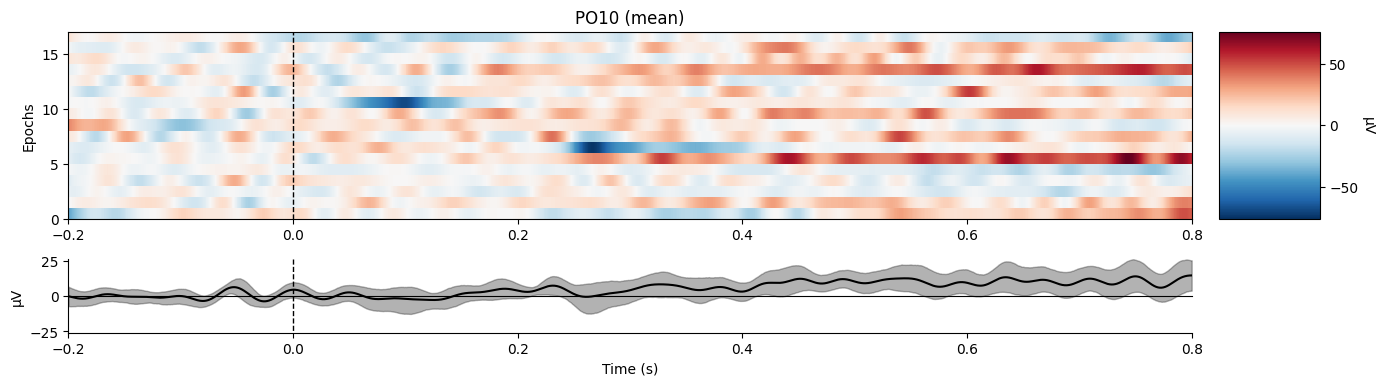

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "AF7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


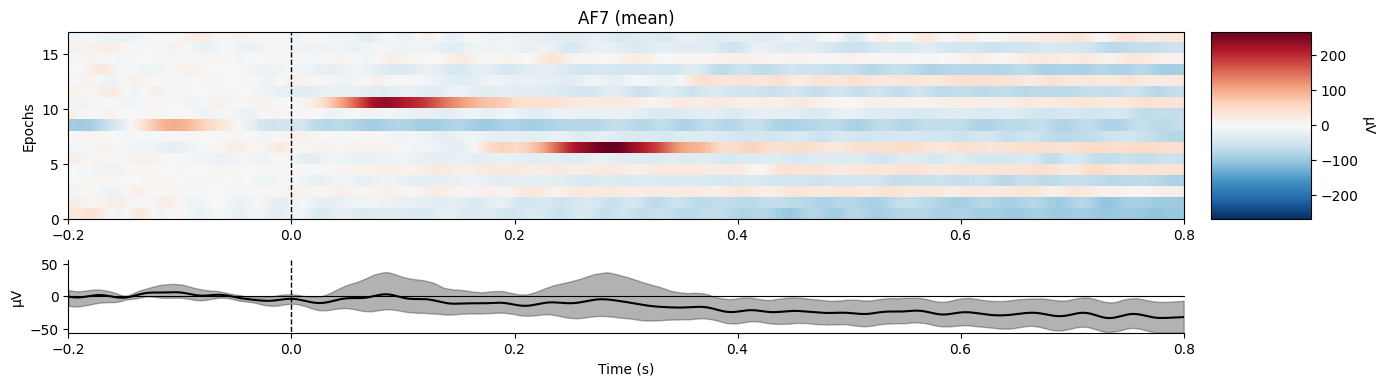

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "AF3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


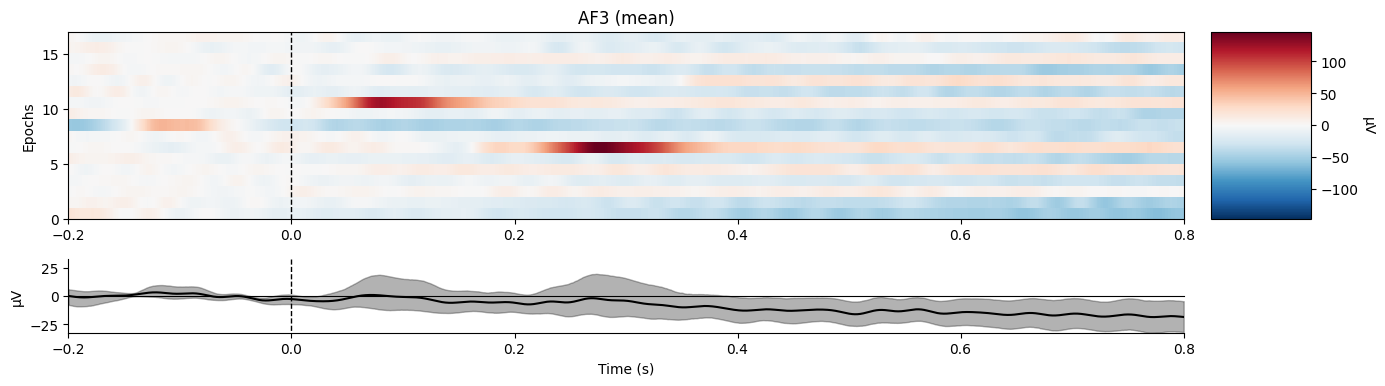

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "AF4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


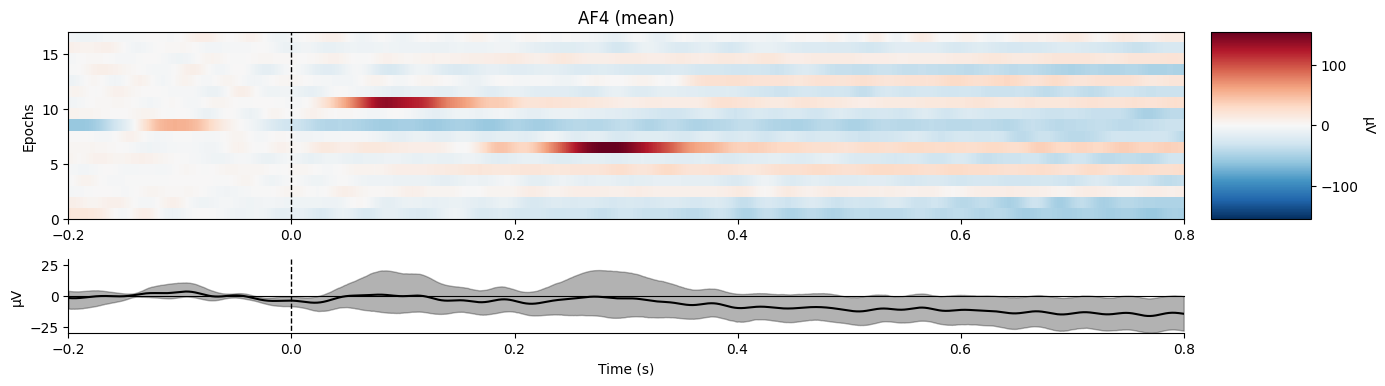

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "AF8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


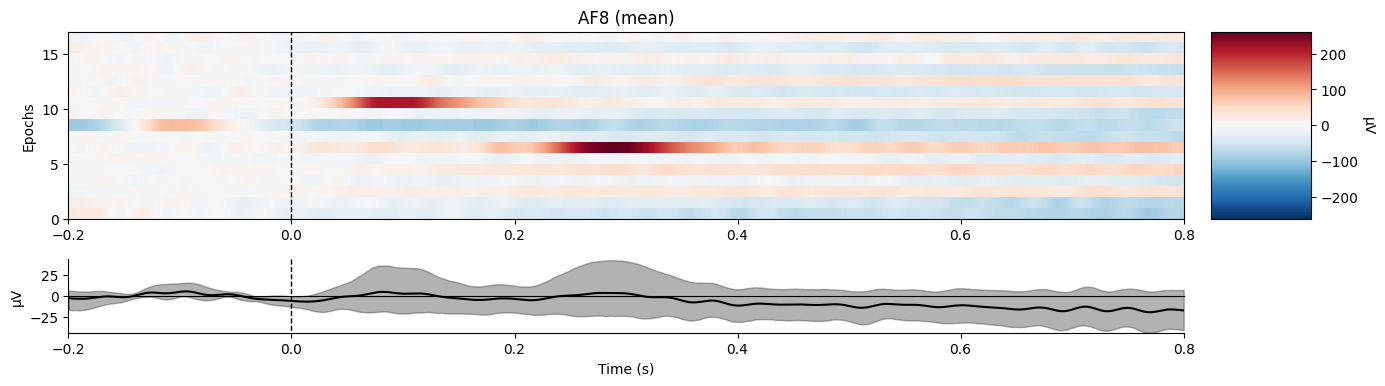

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


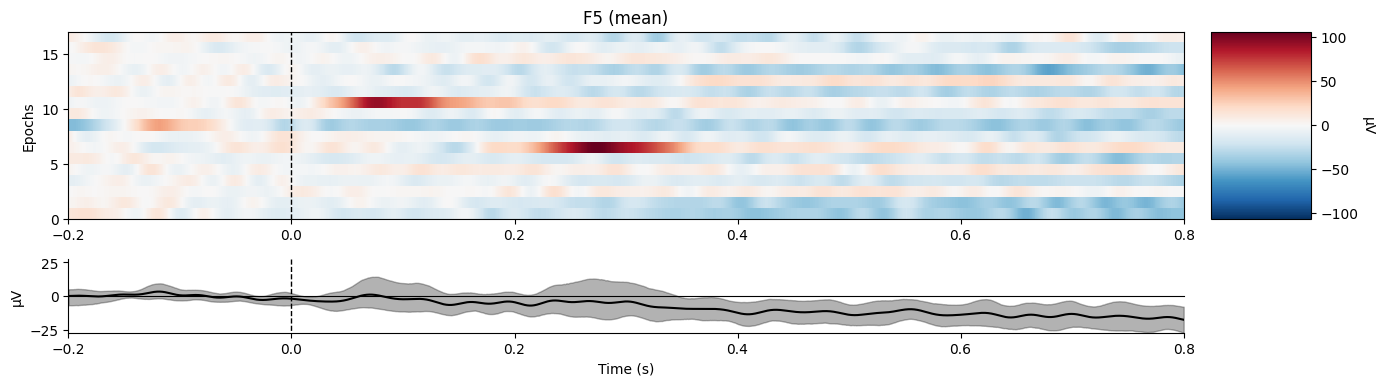

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


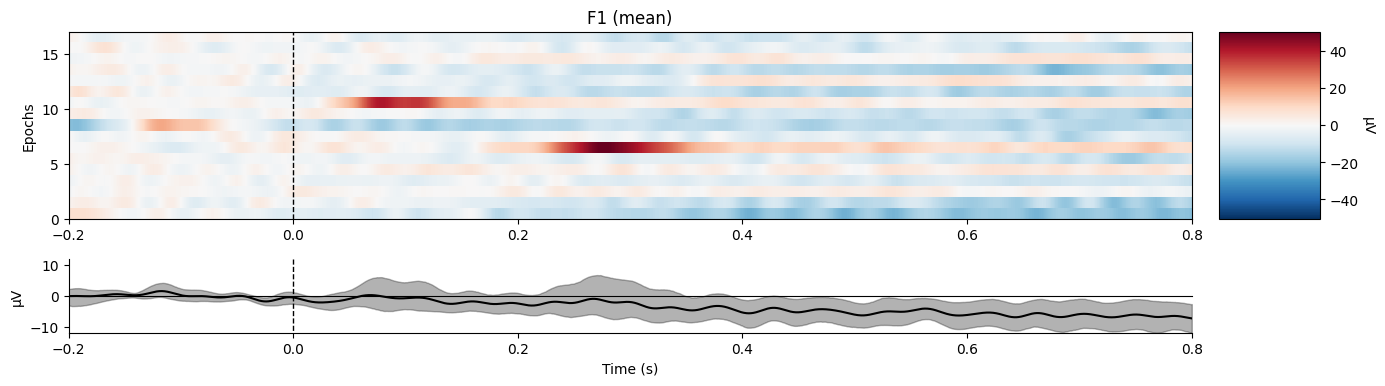

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


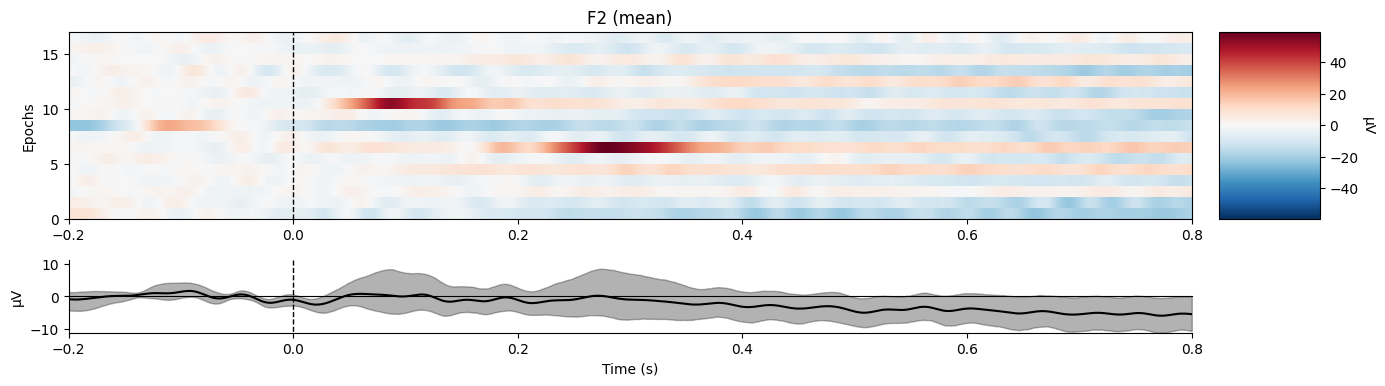

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "F6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


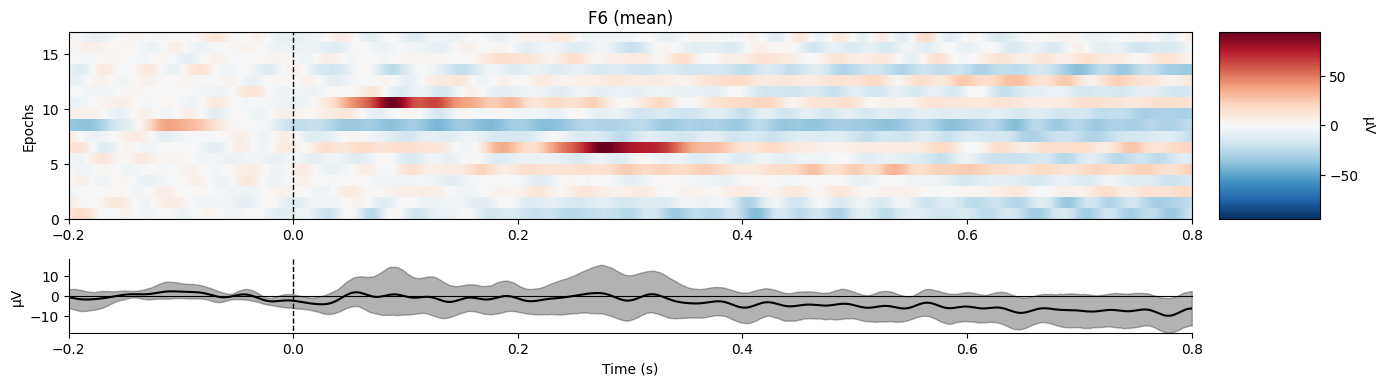

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FT7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


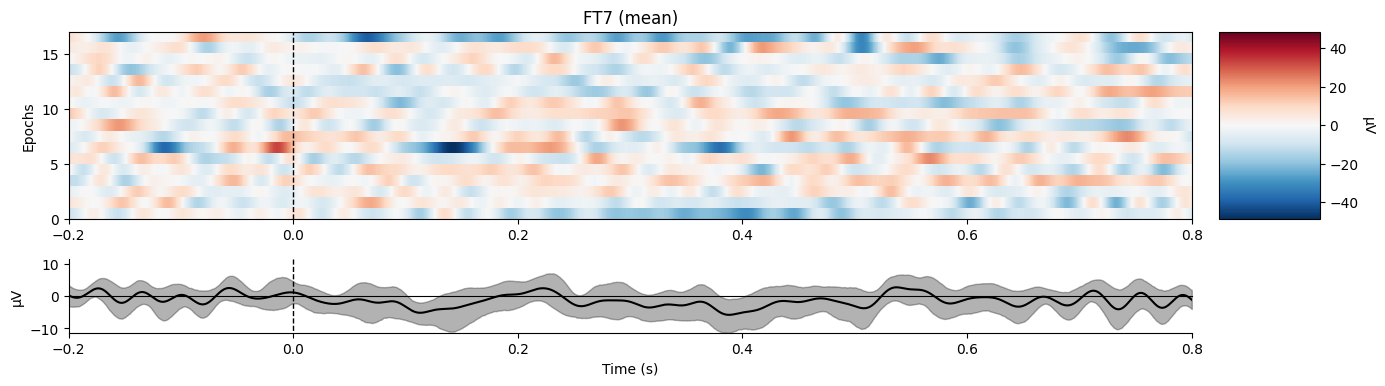

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


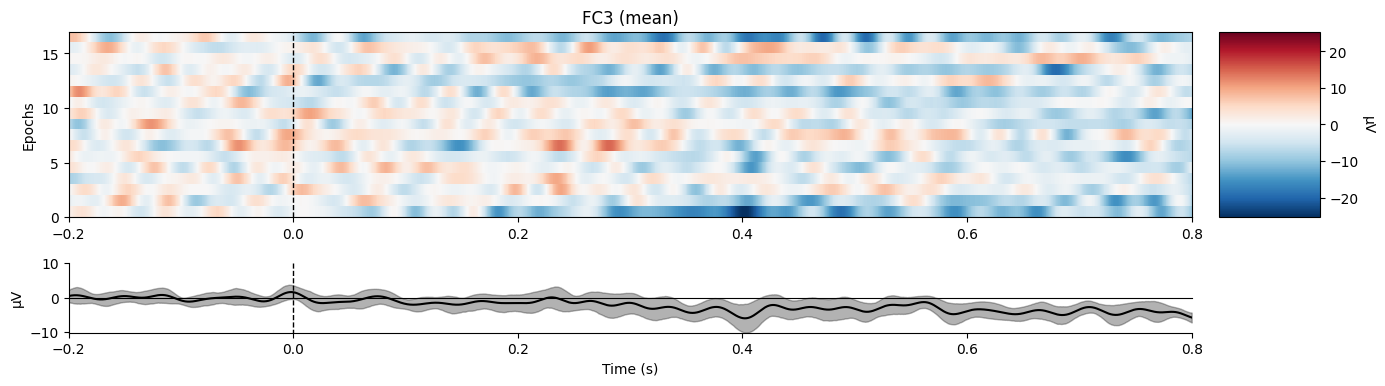

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FC4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


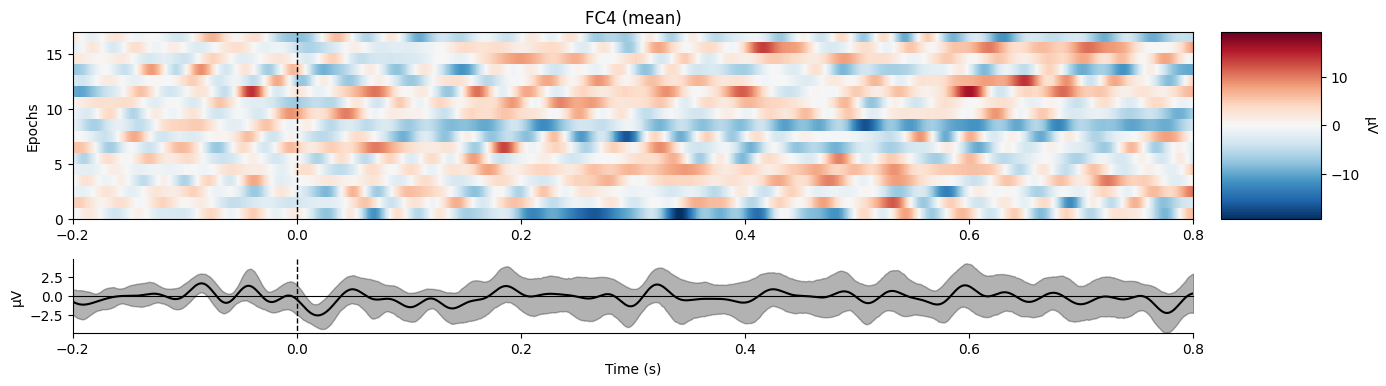

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "FT8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


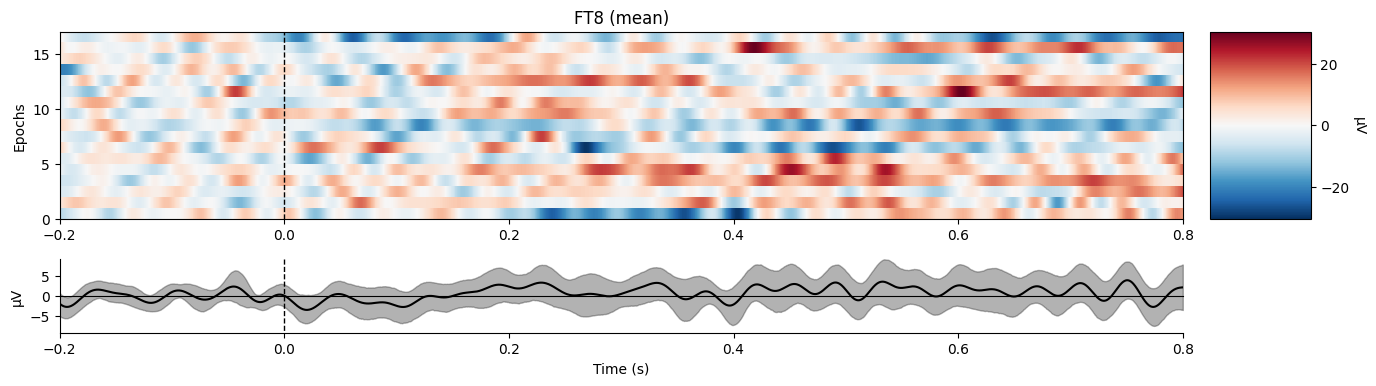

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


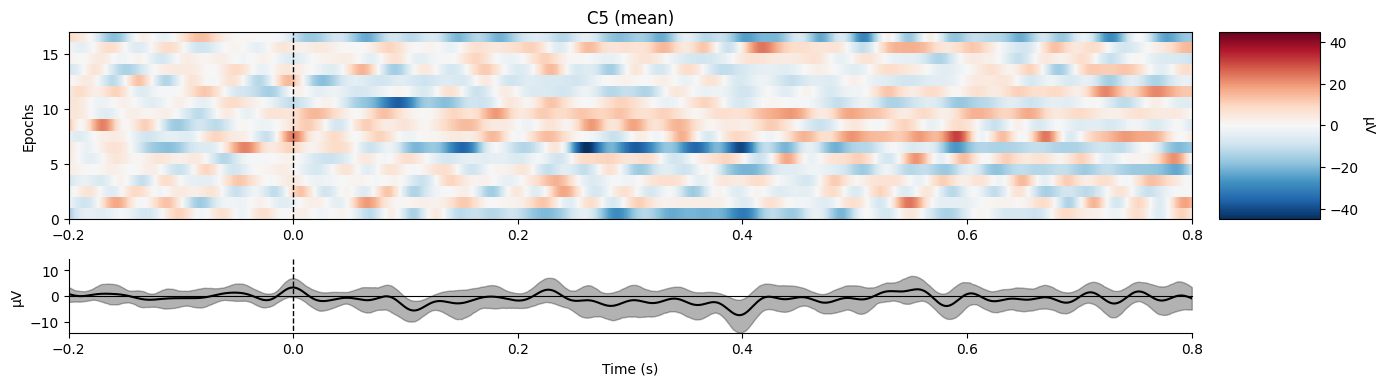

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


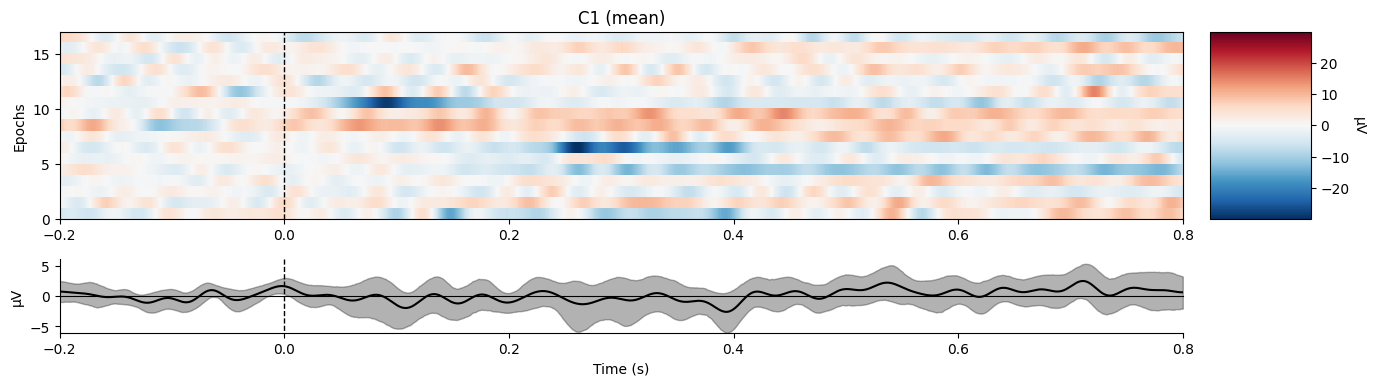

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


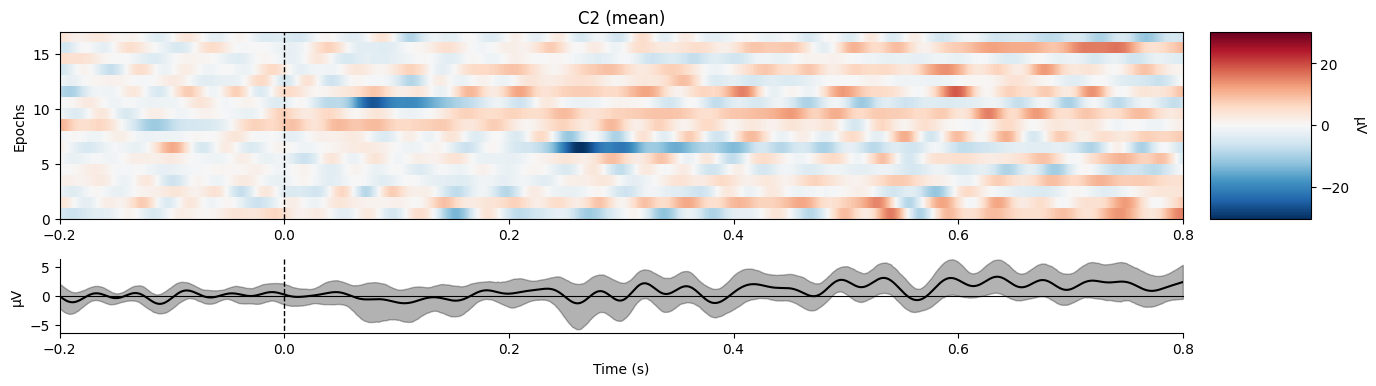

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "C6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


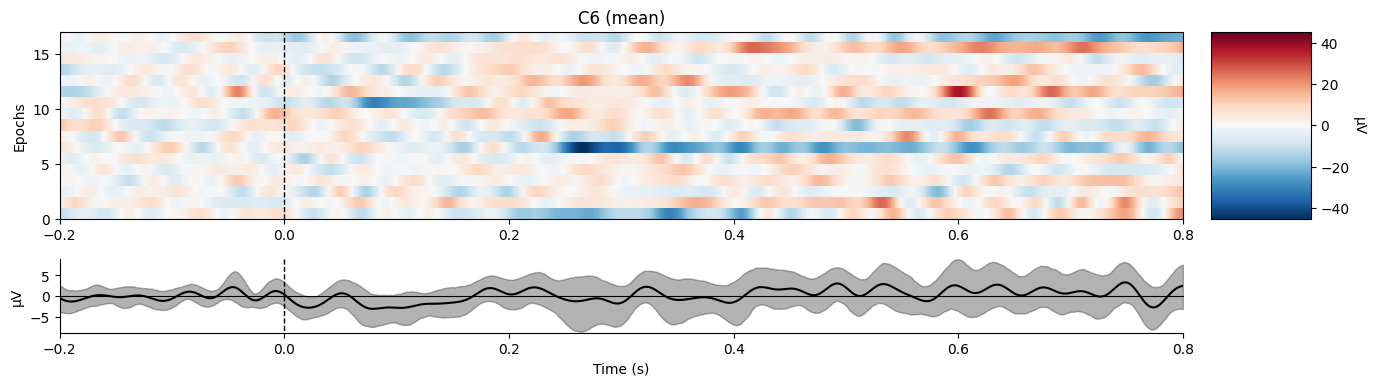

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "TP7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


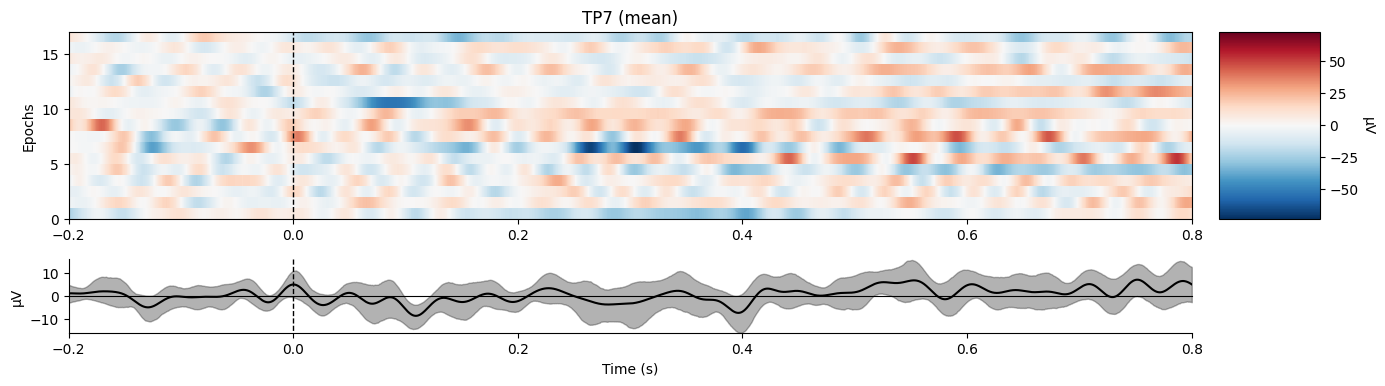

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


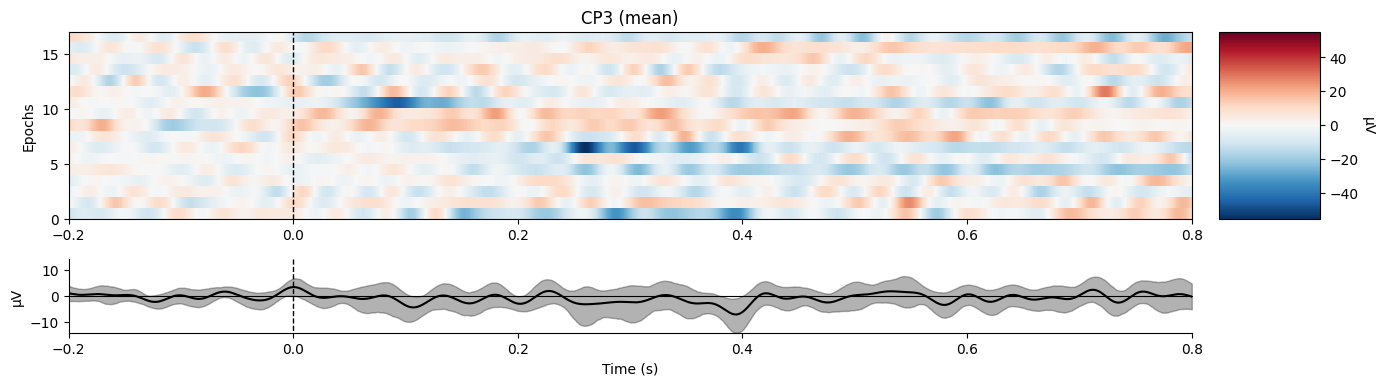

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CPz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


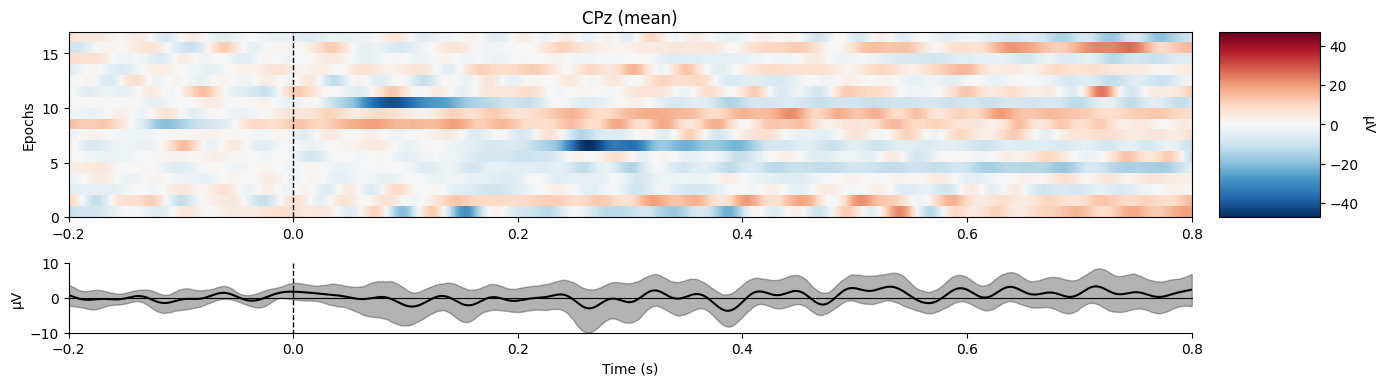

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "CP4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


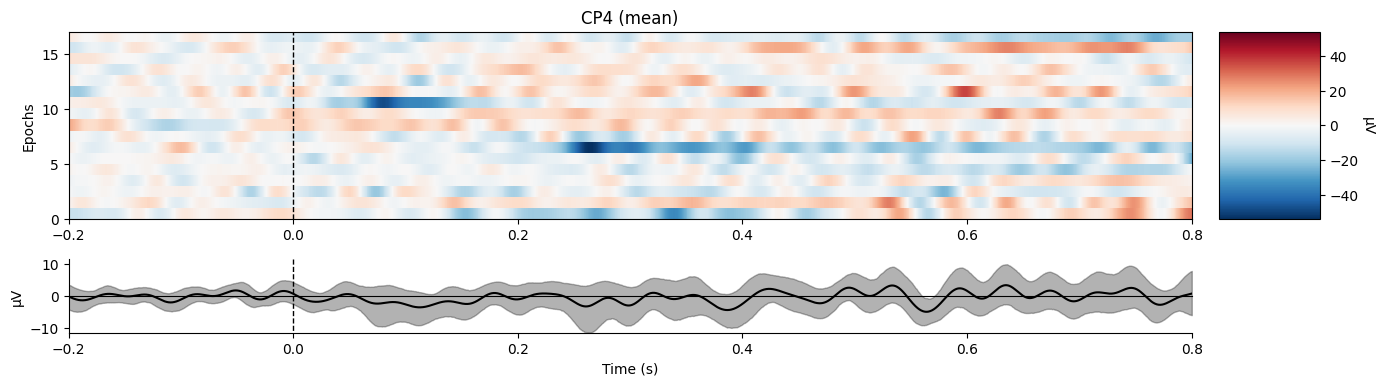

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "TP8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


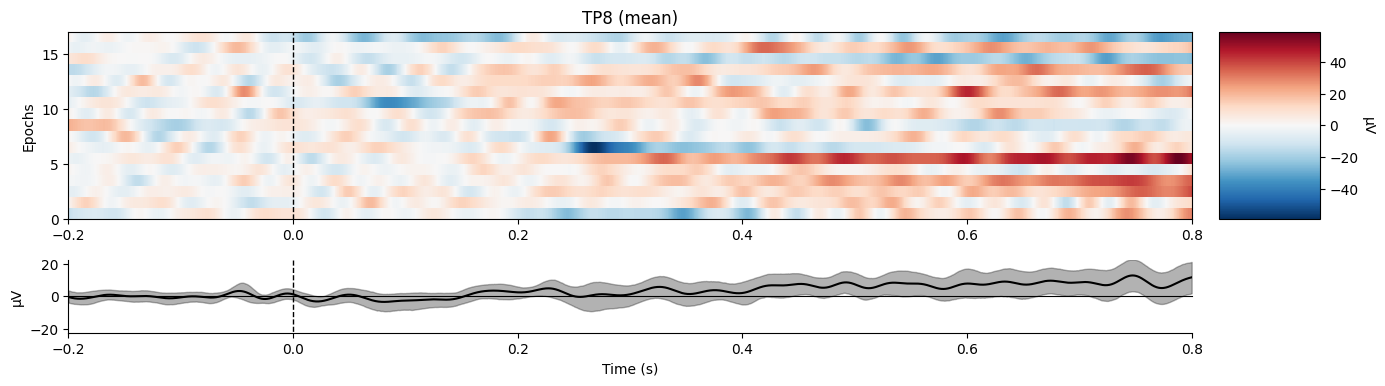

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


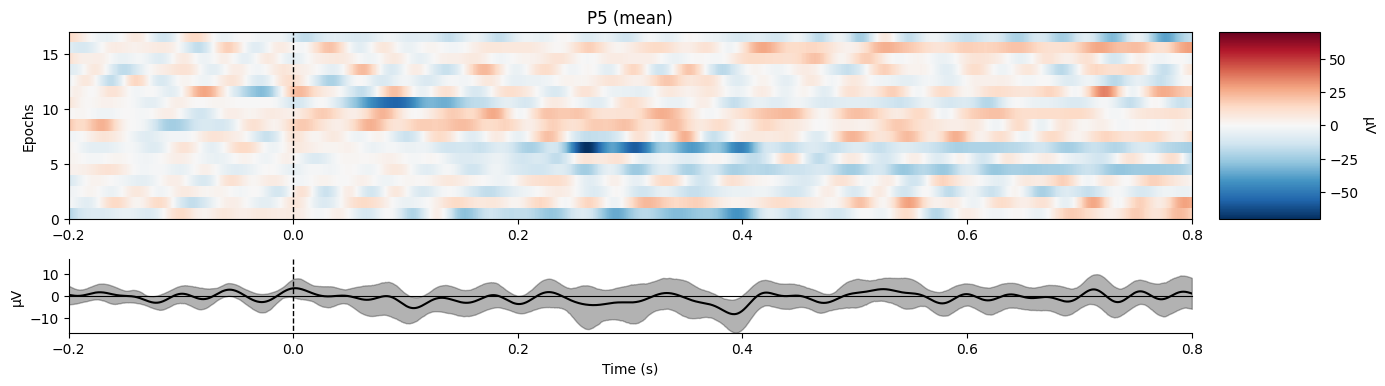

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


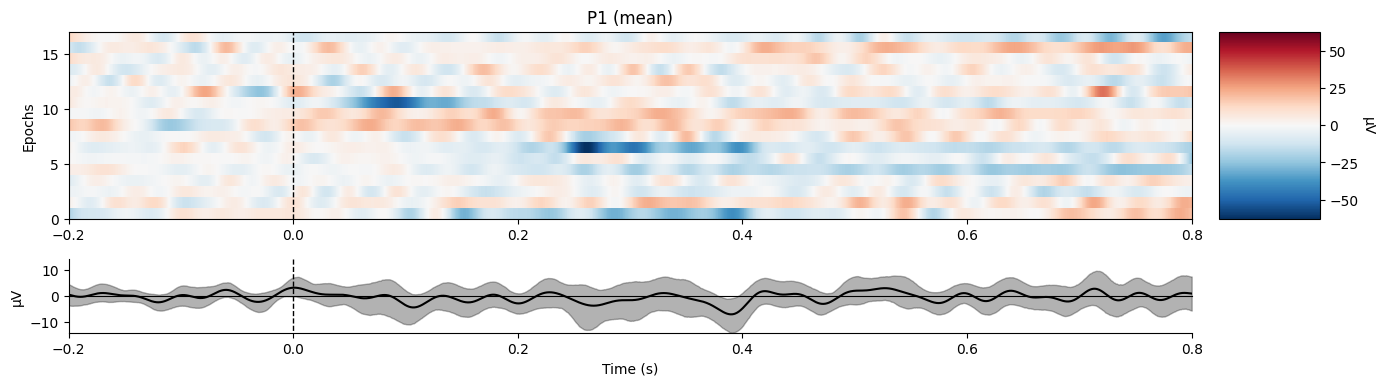

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


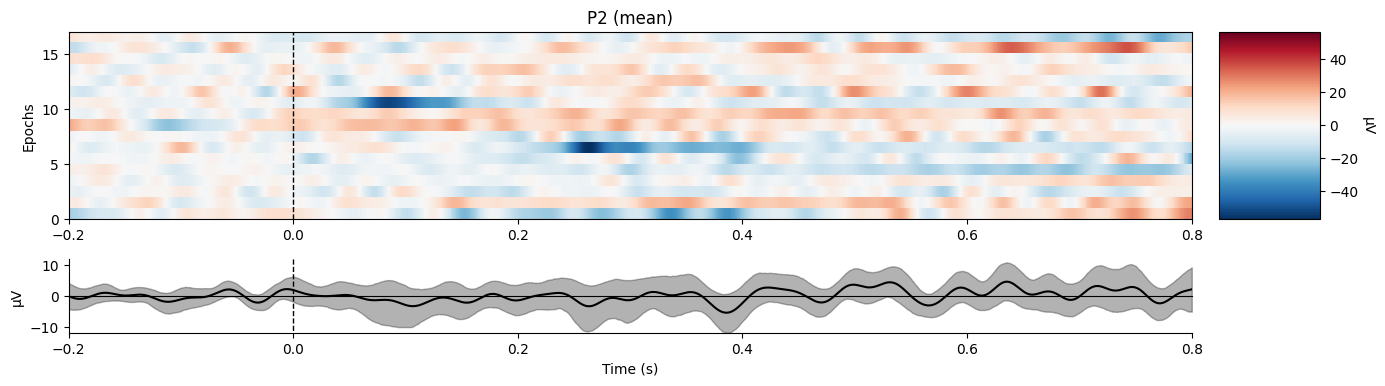

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "P6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


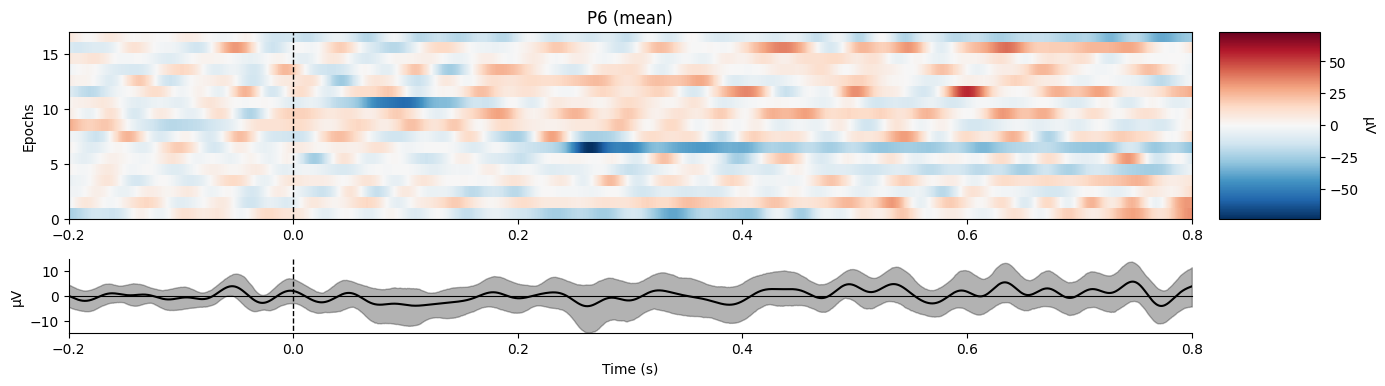

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


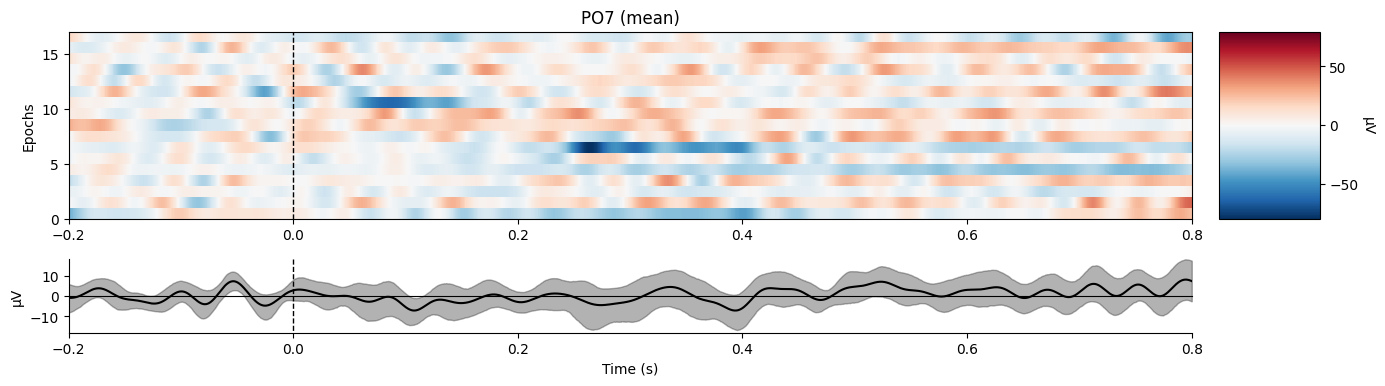

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


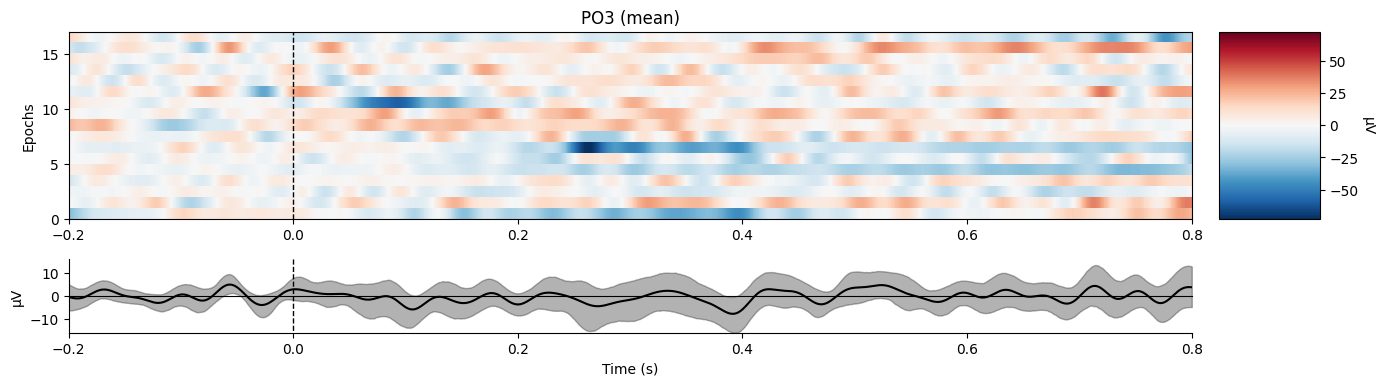

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "POz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


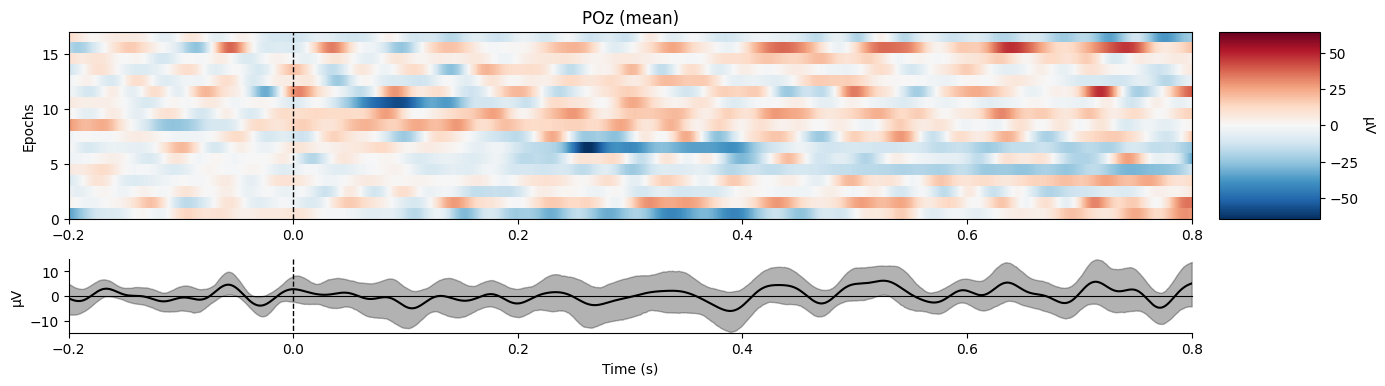

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


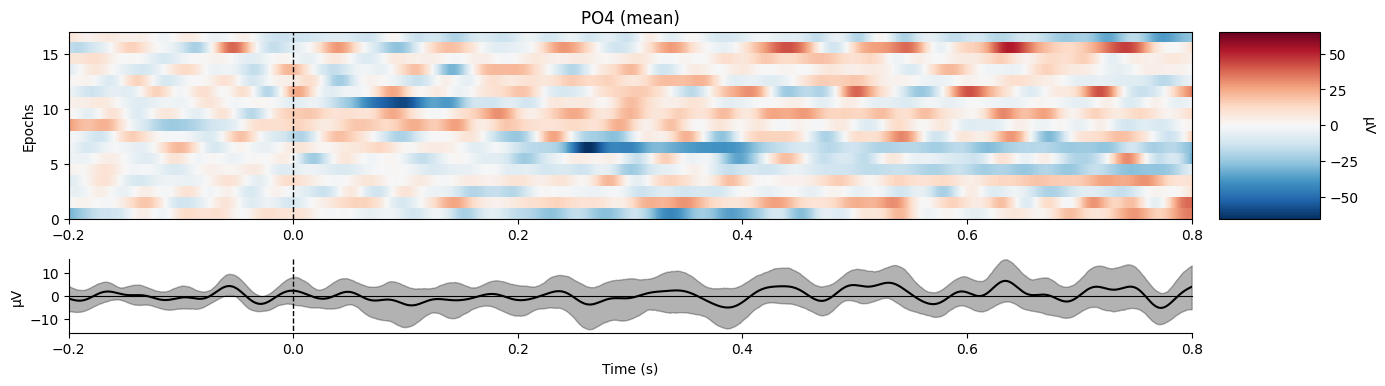

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only one channel in group "PO8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


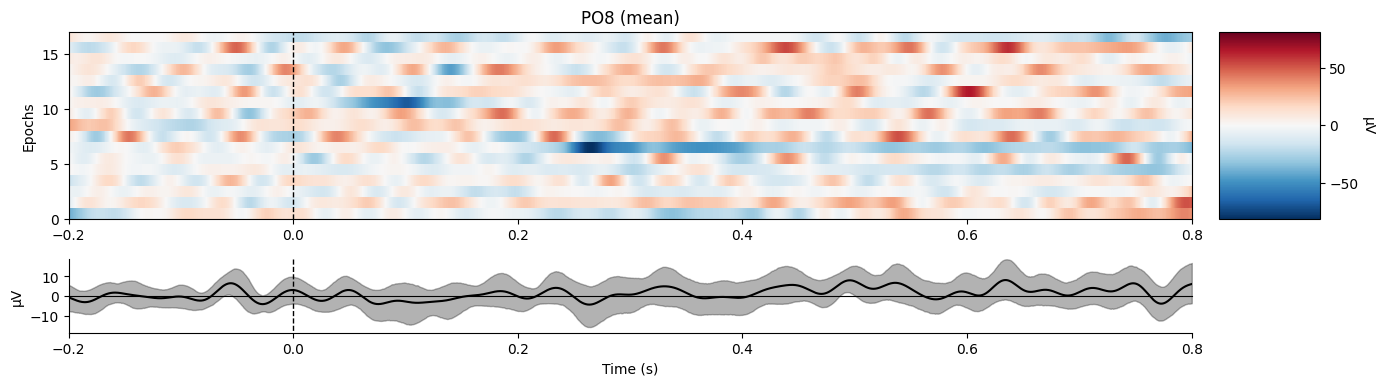

In [14]:
ep_image_plots = []
for i in range(len(channels)):
    ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))

## Frequency Analysis

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\SPierre-Eloy\AppData\Roaming\Python\Python310\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


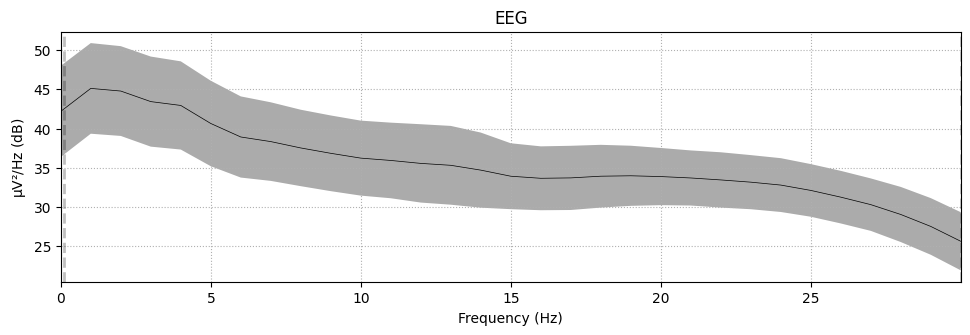

In [15]:
epochs.plot_psd(fmin=0, fmax= 30, average=True, spatial_colors=True);

In [16]:
raw

<RawBrainVision | sub-032301.eeg, 62 x 2555000 (1022.0 s), ~1.18 GB, data loaded>

In [34]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

RuntimeError: No EOG channel(s) found

In [17]:
#epochs.plot_psd_topomap(normalize=True);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\4200443187.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd(fmax = 40, picks = 'eeg');
C:\Users\SPierre-Eloy\AppData\Roaming\Python\Python310\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


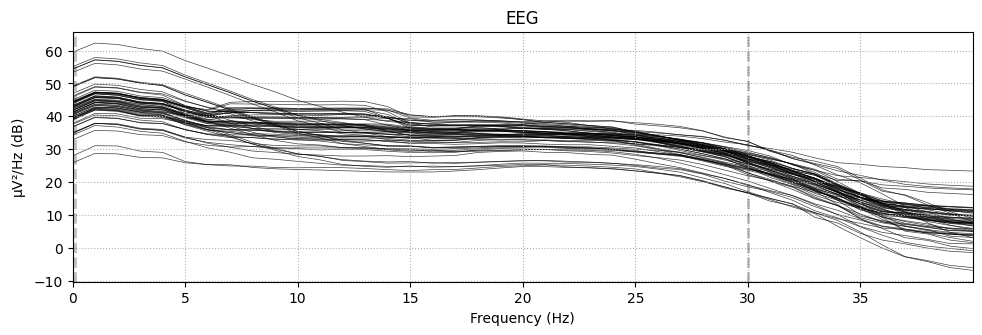

In [18]:
epochs.plot_psd(fmax = 40, picks = 'eeg');

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1002862537.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['T'].plot_psd(fmax = 40, picks = 'eeg');
C:\Users\SPierre-Eloy\AppData\Roaming\Python\Python310\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


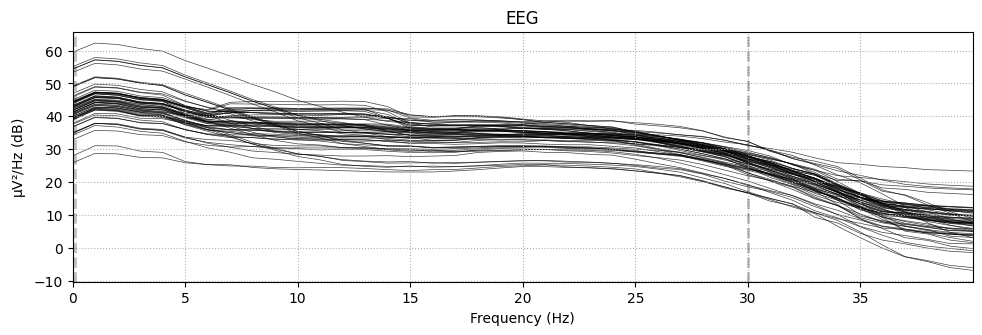

In [19]:
epochs['T'].plot_psd(fmax = 40, picks = 'eeg');

## Generate Evoked data

In [20]:
epochs

<Epochs |  17 events (all good), -0.2 – 0.8 s, baseline -0.2 – 0 s, ~20.2 MB, data loaded,
 'T': 17>

In [21]:
evoked_averaged = epochs.average(by_event_type = True)
evoked_averaged

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[<Evoked | 'T' (average, N=17), -0.2 – 0.8 s, baseline -0.2 – 0 s, 62 ch, ~1.2 MB>]

## Target Evoked plotm

C:\Users\SPierre-Eloy\AppData\Local\Temp\ipykernel_5872\1604310559.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_averaged[0].plot(picks='eeg', spatial_colors=True, gfp=True);


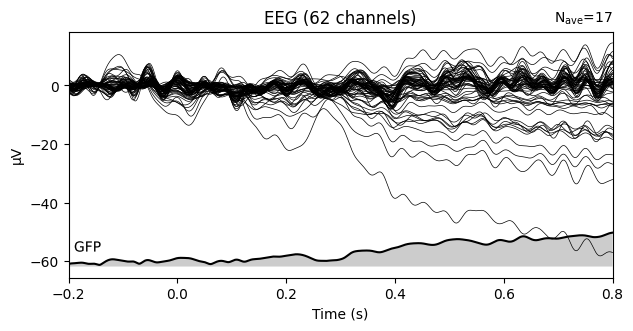

In [22]:
evoked_averaged[0].plot(picks='eeg', spatial_colors=True, gfp=True);

## Topomaps of Evokeds

## Non Target topomaps

## Target topomaps

In [23]:
#times = np.linspace(0.05, 0.25, 5)
#evoked_averaged[0].plot_topomap(ch_type='eeg', times=times, colorbar=True);

## Target Joint plot

In [25]:
#evoked_averaged[0].plot_joint();

## Image plots
## Non Target image plot

## Target image plot

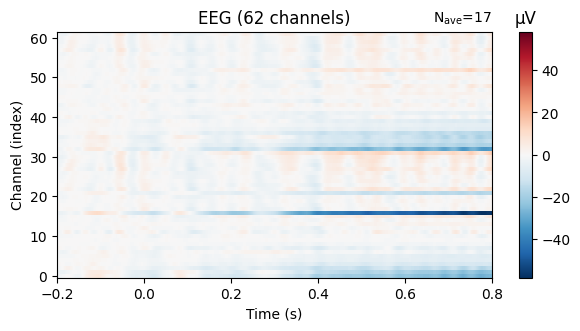

In [26]:
evoked_averaged[0].plot_image(picks='eeg');

## ICA

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 27.8s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

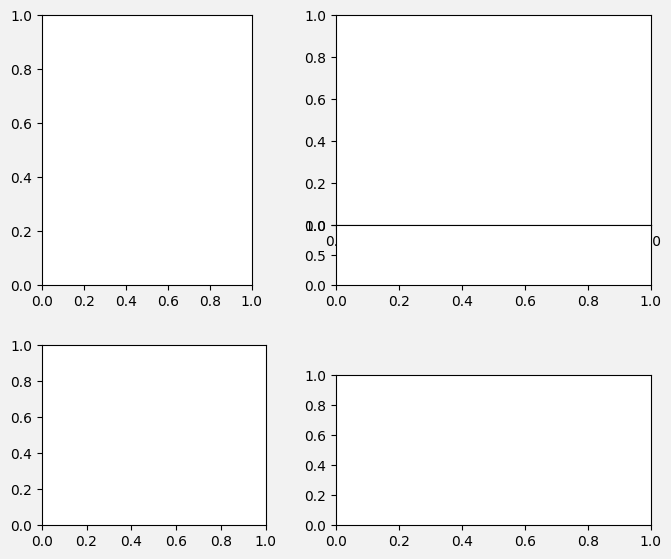

In [27]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 26.6s.
    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

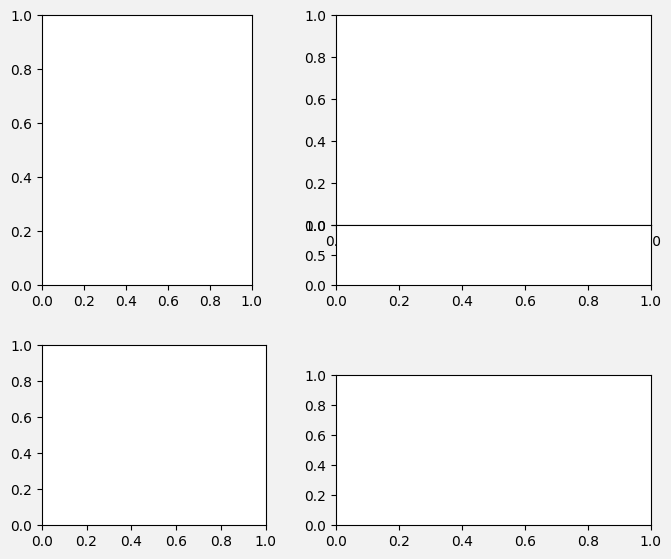

In [28]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

## ICA

In [29]:
from mne.preprocessing import ICA
ica = ICA(n_components=8, max_iter='auto', random_state=13)
ica.fit(filt_raw)
ica

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 24.5s.


<ICA | raw data decomposition, method: fastica (fit in 13 iterations on 2555000 samples), 8 ICA components (62 PCA components available), channel types: eeg, no sources marked for exclusion>

In [30]:
ica.plot_components()

RuntimeError: No digitization points found.

In [ ]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

In [ ]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')


In [ ]:
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6, 7])
